In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("df_with_lyrics.csv")


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/4096071209.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_with_lyrics.csv")


In [3]:
# General structure and types
print(df.info())

# Summary statistics
print(df.describe(include="all"))

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Duplicates
print("Number of duplicates:", df.duplicated().sum())

# Lyrics length in characters
df["lyrics_length"] = df["lyrics"].astype(str).str.len()
print("Lyrics length (characters):\n", df["lyrics_length"].describe())

# Gender distribution
print("Gender counts:\n", df["gender"].value_counts())

# Year range
print("Year range:\n", df["year"].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112518 entries, 0 to 112517
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 112518 non-null  object 
 1   name               112518 non-null  object 
 2   album              112518 non-null  object 
 3   album_id           112518 non-null  object 
 4   artists            112518 non-null  object 
 5   artist_ids         112518 non-null  object 
 6   track_number       112518 non-null  int64  
 7   disc_number        112518 non-null  int64  
 8   explicit           112518 non-null  bool   
 9   danceability       112518 non-null  float64
 10  energy             112518 non-null  float64
 11  key                112518 non-null  int64  
 12  loudness           112518 non-null  float64
 13  mode               112518 non-null  int64  
 14  speechiness        112518 non-null  float64
 15  acousticness       112518 non-null  float64
 16  in

In [4]:
# Word count per song
df["word_count"] = df["lyrics"].astype(str).apply(lambda x: len(x.split()))

# Average lyrics length per gender
print("Average lyrics length:\n", df.groupby("gender")["lyrics_length"].mean())

# Word count statistics by gender
print("Word count by gender:\n", df.groupby("gender")["word_count"].describe())

# Explicit songs by gender
print("Proportion of explicit songs:\n", df.groupby("gender")["explicit"].mean())


Average lyrics length:
 gender
female            221.867807
male              178.528792
non-binary        459.064315
not applicable      3.000000
other             238.885965
Name: lyrics_length, dtype: float64
Word count by gender:
                   count       mean         std  min  25%  50%    75%      max
gender                                                                       
female          23269.0  42.141648  130.303530  1.0  1.0  1.0    1.0  12033.0
male            88636.0  34.464112  143.435044  1.0  1.0  1.0    1.0  22078.0
non-binary        482.0  88.487552  219.823386  1.0  1.0  1.0    1.0   1655.0
not applicable     17.0   1.000000    0.000000  1.0  1.0  1.0    1.0      1.0
other             114.0  44.614035   72.407097  1.0  1.0  1.0  106.5    236.0
Proportion of explicit songs:
 gender
female            0.020972
male              0.041349
non-binary        0.207469
not applicable    0.000000
other             0.000000
Name: explicit, dtype: float64


In [5]:
# Drop entries with missing lyrics or gender
df_clean = df.dropna(subset=["lyrics", "gender"])

# Remove entries with gender = "Unknown"
df_clean = df_clean[df_clean["gender"].str.lower() != "Other"]

# Filter out very short lyrics
df_clean = df_clean[df_clean["word_count"] > 20]

print("Remaining valid songs for text analysis:", len(df_clean))



Remaining valid songs for text analysis: 13655


## Tokenization

In [6]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from langdetect import detect 

# --- 1. Function Definitions ---

# Function for cleaning up lyrics 
def clean_lyrics(text):
    if pd.isna(text):
        return ""
    text = text.lower()  
    text = re.sub(r'\[.*?\]', '', text)  
    text = re.sub(r'[^a-zA-ZäöüÄÖÜß\s]', '', text)  
    text = re.sub(r'\s+', ' ', text)  
    return text.strip()

# Function for language detection
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"


In [7]:
# Create the 'lyrics_clean' column
df['lyrics_clean'] = df['lyrics'].apply(clean_lyrics)

In [8]:
# Create the 'language' column
df['language'] = df['lyrics_clean'].apply(detect_language)

In [9]:
df_en = df[df['language'] == 'en'].copy()

In [10]:
# Average lyrics length per gender
print("Average lyrics length:\n", df_en.groupby("gender")["lyrics_length"].mean())

df_en['gender'].value_counts()

Average lyrics length:
 gender
female        1318.228223
male          1782.816865
non-binary    2503.041667
other          861.000000
Name: lyrics_length, dtype: float64


gender
male          5040
female        1722
non-binary      72
other            1
Name: count, dtype: int64

Artists by Country (English dataset):
country
US    1747
CA    1033
JM     796
GB     632
JP     626
SE     520
NL     350
PH     316
PR     153
ES     120
Name: count, dtype: int64


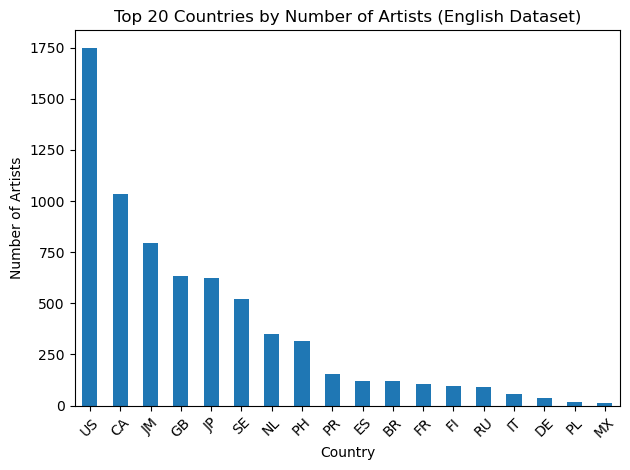

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Artists per country 
country_counts_en = df_en['country'].value_counts()
print("Artists by Country (English dataset):")
print(country_counts_en.head(10))

country_counts_en.head(20).plot(kind='bar')
plt.title("Top 20 Countries by Number of Artists (English Dataset)")
plt.ylabel("Number of Artists")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Artists by Gender (English dataset):
gender
male          5040
female        1722
non-binary      72
other            1
Name: count, dtype: int64


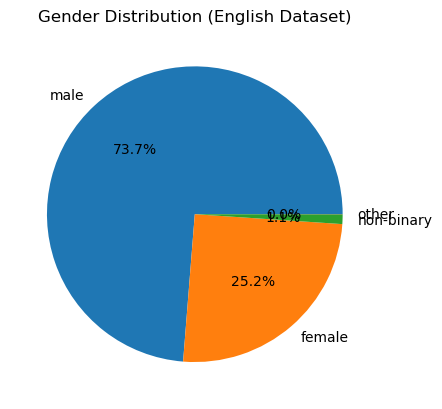

In [12]:
# Distribution by Gender
if 'gender' in df_en.columns:
    gender_counts_en = df_en['gender'].value_counts()
    print("Artists by Gender (English dataset):")
    print(gender_counts_en)

    gender_counts_en.plot(kind='pie', autopct='%1.1f%%')
    plt.title("Gender Distribution (English Dataset)")
    plt.ylabel("")
    plt.show()
else:
    print("Column 'gender' not found in df_en.")


Popularity - Summary Statistics (English dataset):
count    6835.000000
mean       64.895099
std        18.380366
min         1.000000
25%        52.000000
50%        69.000000
75%        79.000000
max       100.000000
Name: artist_popularity, dtype: float64


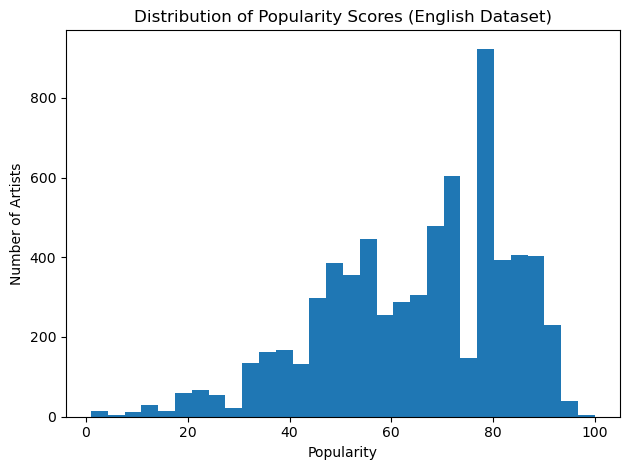

In [13]:
# Distribution of Popularity
if 'artist_popularity' in df_en.columns:
    print("Popularity - Summary Statistics (English dataset):")
    print(df_en['artist_popularity'].describe())

    plt.hist(df_en['artist_popularity'], bins=30)
    plt.title("Distribution of Popularity Scores (English Dataset)")
    plt.xlabel("Popularity")
    plt.ylabel("Number of Artists")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'artist_popularity' not found in df_en.")


Most Common Genres (English Dataset):
['rap']                                                               250
['r&b']                                                               222
['rockabilly', 'rock and roll']                                       137
['chamber pop', 'art pop']                                            113
['opm', 'p-pop']                                                      112
['grunge', 'rock', 'post-grunge']                                     111
['punk', 'pop punk']                                                  110
['christmas']                                                         106
['pop']                                                               104
['disco']                                                             104
['anime', 'j-pop', 'j-rock']                                          101
['west coast hip hop', 'rap rock', 'hip hop']                          91
['funk rock']                                                          87


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/3421530718.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


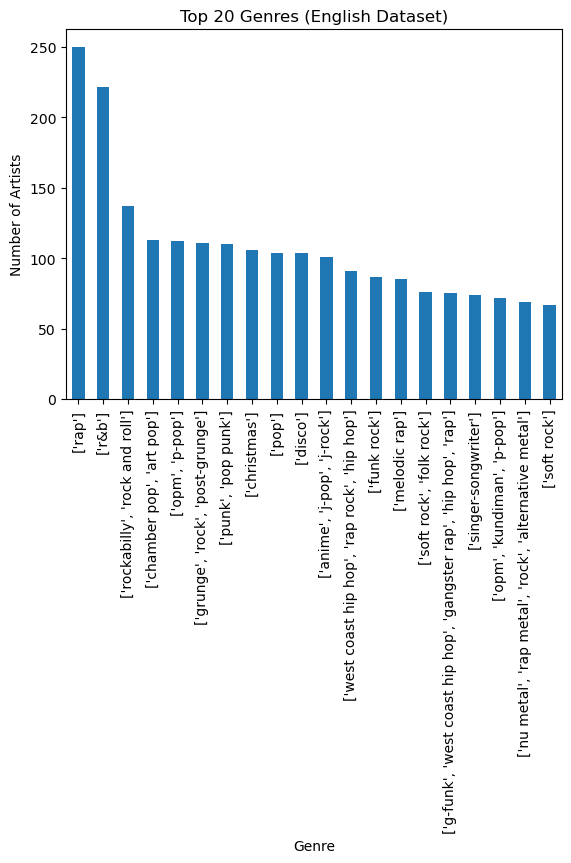

In [14]:
# Distribution of Genres
if 'artist_genres' in df_en.columns:
    all_genres_en = df_en['artist_genres'].explode()
    genre_counts_en = Counter(all_genres_en)
    top_genres_en = pd.Series(dict(genre_counts_en)).sort_values(ascending=False).head(20)

    print("Most Common Genres (English Dataset):")
    print(top_genres_en)

    top_genres_en.plot(kind='bar')
    plt.title("Top 20 Genres (English Dataset)")
    plt.ylabel("Number of Artists")
    plt.xlabel("Genre")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'artist_genres' not found in df_en.")


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')


stop_words_en = set(stopwords.words('english'))


def preprocess_lyrics_en(text):
    if pd.isna(text):
        return []

    tokens = word_tokenize(text, language='english')
    tokens = [t.lower() for t in tokens if t.lower() not in stop_words_en and len(t) > 2]
    return tokens


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sophiekersten/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophiekersten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Preprocessing Function to the English DataFrame ---

df_en = df[df['language'] == 'en'].copy()
df_en['tokens'] = df_en['lyrics'].apply(preprocess_lyrics_en)


In [17]:
import pandas as pd
from transformers import pipeline
import torch
from tqdm.auto import tqdm 

# --- Configuration ---
LYRICS_COLUMN = 'lyrics'      # The name of the column containing the song lyrics
YEAR_COLUMN = 'year'          # The name of the column containing the release year
GENDER_COLUMN = 'gender'      # The name of the column containing the artist's gender


NUM_SONGS_TO_PROCESS = None 

# Output files for results after each step
OUTPUT_FILE_STEP1 = 'song_lyrics_prepared.csv'
OUTPUT_FILE_STEP2_NER = 'song_lyrics_with_ner.csv'
OUTPUT_FILE_STEP3_PRONOUNS = 'song_lyrics_with_pronouns.csv'
OUTPUT_FILE_STEP4_INTENTIONS = 'song_lyrics_with_bert_analysis_final.csv'
OUTPUT_FILE_STEP4_EMOTION = 'song_lyrics_with_bert_analysis_final.csv' 


# --- 0. Load and Prepare DataFrame ---
print("--- Part 1: Loading and Preparing Data ---")


if 'df_en' not in locals() and 'df_en' not in globals():
    print("Error: DataFrame 'df_en' not found. Please load your data into 'df_en' first.")
    exit()

for col in [LYRICS_COLUMN, YEAR_COLUMN, GENDER_COLUMN]:
    if col not in df_en.columns:
        print(f"Error: The column '{col}' was not found in the DataFrame 'df_en'.")
        print(f"Available columns: {df_en.columns.tolist()}")
        exit()

df_en.dropna(subset=[LYRICS_COLUMN], inplace=True) # Remove rows with missing lyrics
df_en[LYRICS_COLUMN] = df_en[LYRICS_COLUMN].astype(str) # Ensure all lyrics are strings

if df_en.empty:
    print("The DataFrame is empty after cleaning. Please check your data.")
    exit()

# Convert year to numeric and handle non-numeric entries
df_en[YEAR_COLUMN] = pd.to_numeric(df_en[YEAR_COLUMN], errors='coerce')
df_en.dropna(subset=[YEAR_COLUMN], inplace=True) 


if NUM_SONGS_TO_PROCESS is not None:
    df_en = df_en.head(NUM_SONGS_TO_PROCESS).copy() 
    print(f"Processing a sample of {len(df_en)} songs.")
else:
    print(f"Processing all {len(df_en)} songs.")

print("Data preparation complete.")
print(df_en.head())

# Save the prepared (and potentially sampled) DataFrame
df_en.to_csv(OUTPUT_FILE_STEP1, index=False)
print(f"Prepared DataFrame saved to {OUTPUT_FILE_STEP1}")

tqdm.pandas()

--- Part 1: Loading and Preparing Data ---
Processing all 6835 songs.
Data preparation complete.
                          id                                    name  \
3002  3ZjmloY4fJkfs9qYH82Oau                                 Poquito   
3005  326jKGa1FVqDF5Yeahq8Nn                  Ugly - English Version   
3009  4cno0k9jDEFpLAQyHNjqVx  Tócame (feat. Arcangel & De La Ghetto)   
3014  6532nOWtuYIzYaN44pcrHy                Amor Real - Holiday Song   
3110  0sy2eLJB1o7Fa8kAc7gVzW                                  Notion   

                                               album                album_id  \
3002                                          Kisses  5yV6JVfsLGdi3QMclVkvMW   
3005  UglyDolls (Original Motion Picture Soundtrack)  27RUK36qlkCtwySz0pBQXq   
3009          Tócame (feat. Arcangel & De La Ghetto)  6OW0sjGhqQJKxjcBzyvpcq   
3014                        Amor Real (Holiday Song)  0X4nxSqynfCpG9LMJ9jK13   
3110                                          Notion  3o4LAzf8y2BQ3eJ4

In [18]:
# --- Part 2: Applying BERT for Named Entity Recognition (NER) ---

try:
    df_en = pd.read_csv(OUTPUT_FILE_STEP1)
    df_en[LYRICS_COLUMN] = df_en[LYRICS_COLUMN].astype(str) 
    print(f"Loaded DataFrame for NER from {OUTPUT_FILE_STEP1}. Number of songs: {len(df_en)}")
except FileNotFoundError:
    print(f"Error: Could not load {OUTPUT_FILE_STEP1}. Please run Part 1 first.")
    exit()

print("\n--- Applying BERT for Named Entity Recognition (NER) ---")
try:
    ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple", device=0 if torch.cuda.is_available() else -1)
    print(f"BERT NER Model loaded. Using device: {'GPU' if torch.cuda.is_available() else 'CPU'}")
except Exception as e:
    print(f"ERROR loading BERT NER Model: {e}")
    print("Please ensure you have an internet connection and the 'transformers' library is correctly installed.")
    exit()

df_en['detected_entities'] = None

def apply_ner(text):
    if not isinstance(text, str) or not text.strip():
        return []
    entities = ner_pipeline(text)
    person_entities = [
        {'word': ent['word'], 'score': ent['score'], 'entity_group': ent['entity_group']}
        for ent in entities if ent['entity_group'] == 'PER'
    ]
    return person_entities

print(f"Applying NER to {len(df_en)} song lyrics in '{LYRICS_COLUMN}'...")
df_en['detected_entities'] = df_en[LYRICS_COLUMN].progress_apply(apply_ner)
print("NER analysis completed.")
print(df_en.head())

# Save results after NER
df_en.to_csv(OUTPUT_FILE_STEP2_NER, index=False)
print(f"DataFrame with NER results saved to {OUTPUT_FILE_STEP2_NER}")


Loaded DataFrame for NER from song_lyrics_prepared.csv. Number of songs: 6835

--- Applying BERT for Named Entity Recognition (NER) ---


Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


BERT NER Model loaded. Using device: CPU
Applying NER to 6835 song lyrics in 'lyrics'...


  0%|          | 0/6835 [00:00<?, ?it/s]

NER analysis completed.
                       id                                    name  \
0  3ZjmloY4fJkfs9qYH82Oau                                 Poquito   
1  326jKGa1FVqDF5Yeahq8Nn                  Ugly - English Version   
2  4cno0k9jDEFpLAQyHNjqVx  Tócame (feat. Arcangel & De La Ghetto)   
3  6532nOWtuYIzYaN44pcrHy                Amor Real - Holiday Song   
4  0sy2eLJB1o7Fa8kAc7gVzW                                  Notion   

                                            album                album_id  \
0                                          Kisses  5yV6JVfsLGdi3QMclVkvMW   
1  UglyDolls (Original Motion Picture Soundtrack)  27RUK36qlkCtwySz0pBQXq   
2          Tócame (feat. Arcangel & De La Ghetto)  6OW0sjGhqQJKxjcBzyvpcq   
3                        Amor Real (Holiday Song)  0X4nxSqynfCpG9LMJ9jK13   
4                                          Notion  3o4LAzf8y2BQ3eJ4fmIjvi   

                                  artists  \
0                  ['Anitta', 'Swae Lee']   
1       

In [19]:
# --- Part 3: Simple Pronoun and Gender-Related Term Detection ---

try:
    df_en = pd.read_csv(OUTPUT_FILE_STEP2_NER)
    df_en[LYRICS_COLUMN] = df_en[LYRICS_COLUMN].astype(str) 
    print(f"Loaded DataFrame for pronoun detection from {OUTPUT_FILE_STEP2_NER}. Number of songs: {len(df_en)}")
except FileNotFoundError:
    print(f"Error: Could not load {OUTPUT_FILE_STEP2_NER}. Please run Part 1 and Part 2 first.")
    exit()

print("\n--- Performing simple pronoun and gender-related term detection ---")
gender_pronouns_and_terms = {
    'male': ['he', 'him', 'his', 'mr', 'sir', 'boy', 'man', 'men', 'guy', 'dude', 'bro', 'father', 'brother', 'son', 'king', 'prince', 'husband', 'boyfriend', 'male'],
    'female': ['she', 'her', 'hers', 'ms', 'mrs', 'miss', 'madam', 'lady', 'girl', 'woman', 'women', 'chick', 'sis', 'mother', 'sister', 'daughter', 'queen', 'princess', 'wife', 'girlfriend', 'female'],
    'neutral': ['they', 'them', 'their', 'theirs', 'person', 'individual', 'people', 'partner', 'lover', 'friend', 'human']
}

def find_pronouns_and_gender_terms(text):
    found_genders = {'male': [], 'female': [], 'neutral': []}
    words = text.lower().replace('.', '').replace(',', '').replace('!', '').replace('?', '').split()
    
    for word in words:
        if word in gender_pronouns_and_terms['male']:
            found_genders['male'].append(word)
        elif word in gender_pronouns_and_terms['female']:
            found_genders['female'].append(word)
        elif word in gender_pronouns_and_terms['neutral']:
            found_genders['neutral'].append(word)
            
    return {k: list(set(v)) for k, v in found_genders.items()}

print(f"Performing pronoun detection on {len(df_en)} song lyrics...")
df_en['detected_pronouns_and_terms'] = df_en[LYRICS_COLUMN].progress_apply(find_pronouns_and_gender_terms)
print("Pronoun and gender-related term detection completed.")
print(df_en.head())

# Save results after pronoun detection
df_en.to_csv(OUTPUT_FILE_STEP3_PRONOUNS, index=False)
print(f"DataFrame with pronoun results saved to {OUTPUT_FILE_STEP3_PRONOUNS}")

Loaded DataFrame for pronoun detection from song_lyrics_with_ner.csv. Number of songs: 6835

--- Performing simple pronoun and gender-related term detection ---
Performing pronoun detection on 6835 song lyrics...


  0%|          | 0/6835 [00:00<?, ?it/s]

Pronoun and gender-related term detection completed.
                       id                                    name  \
0  3ZjmloY4fJkfs9qYH82Oau                                 Poquito   
1  326jKGa1FVqDF5Yeahq8Nn                  Ugly - English Version   
2  4cno0k9jDEFpLAQyHNjqVx  Tócame (feat. Arcangel & De La Ghetto)   
3  6532nOWtuYIzYaN44pcrHy                Amor Real - Holiday Song   
4  0sy2eLJB1o7Fa8kAc7gVzW                                  Notion   

                                            album                album_id  \
0                                          Kisses  5yV6JVfsLGdi3QMclVkvMW   
1  UglyDolls (Original Motion Picture Soundtrack)  27RUK36qlkCtwySz0pBQXq   
2          Tócame (feat. Arcangel & De La Ghetto)  6OW0sjGhqQJKxjcBzyvpcq   
3                        Amor Real (Holiday Song)  0X4nxSqynfCpG9LMJ9jK13   
4                                          Notion  3o4LAzf8y2BQ3eJ4fmIjvi   

                                  artists  \
0                  ['Ani

In [20]:
# --- Part 4: Applying BERT for Emotion Analysis ---
print("--- Part 4: Applying BERT for Emotion Analysis ---")


try:
    df_en = pd.read_csv(OUTPUT_FILE_STEP3_PRONOUNS)
    df_en[LYRICS_COLUMN] = df_en[LYRICS_COLUMN].astype(str) 
    df_en['detected_entities'] = df_en['detected_entities'].apply(eval)
    df_en['detected_pronouns_and_terms'] = df_en['detected_pronouns_and_terms'].apply(eval)
    print(f"Loaded DataFrame for emotion analysis from {OUTPUT_FILE_STEP3_PRONOUNS}. Number of songs: {len(df_en)}")
except FileNotFoundError:
    print(f"Error: Could not load {OUTPUT_FILE_STEP3_PRONOUNS}. Please run Part 1, 2, and 3 first.")
    exit()
except Exception as e:
    print(f"Error reloading columns from {OUTPUT_FILE_STEP3_PRONOUNS} (expected if saved as string): {e}")
    print("Attempting to parse columns, ensure they are lists/dicts.")

print("\n--- Initializing Emotion Classifier ---")
try:
    device = "mps" if torch.backends.mps.is_available() else (0 if torch.cuda.is_available() else -1)
    
    # Initialize the emotion classification pipeline
    emotion_classifier = pipeline(
        "text-classification",
        model="j-hartmann/emotion-english-distilroberta-base",
        top_k=None, # Keep all labels and their scores for more detailed analysis
        device=device, # Pass the determined device
        truncation=True # This tells the pipeline to truncate long texts to the model's max length (512 tokens for this model)
    )
    print(f"Emotion Classifier Model loaded. Using device: {device}")
except Exception as e:
    print(f"ERROR loading Emotion Classifier Model: {e}")
    print("Please ensure you have an internet connection and the 'transformers' library is correctly installed.")
    exit()
    # Function to get emotion(s)
def get_emotion_scores(text):
    if not isinstance(text, str) or not text.strip():
        if 'emotion_classifier' in globals() and hasattr(emotion_classifier.model.config, 'id2label'):
             return [{'label': label, 'score': 0.0} for label in emotion_classifier.model.config.id2label.values()]
        else: 
             return [{'label': 'unknown', 'score': 0.0}] 
    
    results = emotion_classifier(text)[0] 
    return results

# Apply emotion analysis
print(f"Applying Emotion Analysis to {len(df_en)} song lyrics...")
df_en['detected_emotions_scores'] = df_en[LYRICS_COLUMN].progress_apply(get_emotion_scores)
print("Emotion analysis completed.")


print("Expanding emotion scores into separate columns...")



if 'emotion_classifier' in globals() and hasattr(emotion_classifier.model.config, 'id2label'):
    all_possible_labels = list(emotion_classifier.model.config.id2label.values())
else:
    print("Warning: emotion_classifier not fully initialized. Using default emotion labels.")
    all_possible_labels = ['sadness', 'anger', 'joy', 'fear', 'surprise', 'neutral', 'disgust'] # Fallback labels

empty_scores_dict = {label: 0.0 for label in all_possible_labels}

def get_scores_dict_for_expansion(emotion_list):
    if not emotion_list:
        return empty_scores_dict 
    current_scores = {item['label']: item['score'] for item in emotion_list}
    full_scores = {label: current_scores.get(label, 0.0) for label in all_possible_labels}
    return full_scores

expanded_emotions = df_en['detected_emotions_scores'].apply(get_scores_dict_for_expansion)
emotions_df = pd.DataFrame(expanded_emotions.tolist(), index=df_en.index)
emotions_df.columns = [f'emotion_{col}' for col in emotions_df.columns] # Prefix column names

df_en = pd.concat([df_en, emotions_df], axis=1)

# Get the primary (top) emotion as a separate column for easy access

df_en['primary_emotion'] = df_en['detected_emotions_scores'].apply(
    lambda x: x[0]['label'] if x and len(x) > 0 else 'none' 
)

print("\n--- Emotion Analysis Results (first 5 songs) ---")
print(df_en[[LYRICS_COLUMN, 'primary_emotion'] + [col for col in df_en.columns if col.startswith('emotion_')]].head())

print("\n--- Primary Emotion Distribution ---")
print(df_en['primary_emotion'].value_counts(normalize=True))

# Save results after emotion analysis
df_en.to_csv(OUTPUT_FILE_STEP4_EMOTION, index=False)
print(f"DataFrame with emotion results saved to {OUTPUT_FILE_STEP4_EMOTION}")

--- Part 4: Applying BERT for Emotion Analysis ---
Loaded DataFrame for emotion analysis from song_lyrics_with_pronouns.csv. Number of songs: 6835

--- Initializing Emotion Classifier ---


Device set to use mps


Emotion Classifier Model loaded. Using device: mps
Applying Emotion Analysis to 6835 song lyrics...


  0%|          | 0/6835 [00:00<?, ?it/s]

Emotion analysis completed.
Expanding emotion scores into separate columns...

--- Emotion Analysis Results (first 5 songs) ---
                                              lyrics primary_emotion  \
0  20 ContributorsTranslationsPortuguêsPoquito Ly...         neutral   
1  10 ContributorsUgly (English Version﻿) Lyrics\...         sadness   
2  4 ContributorsTranslationsEspañolPortuguêsAnit...         neutral   
3  7 ContributorsAmor Real (Holiday Song) Lyrics\...         neutral   
4  15 ContributorsNotion Lyrics11th and last trac...         neutral   

   emotion_anger  emotion_disgust  emotion_fear  emotion_joy  emotion_neutral  \
0       0.160121         0.082029      0.062616     0.043445         0.460457   
1       0.010280         0.051730      0.007412     0.002640         0.005672   
2       0.088581         0.134538      0.157789     0.065720         0.459037   
3       0.020626         0.008756      0.024885     0.299032         0.522720   
4       0.107642         0.034411 

In [21]:
#Part 5: Applying Lexicon-based Sentiment Analysis (VADER)
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


try:
    df_en = pd.read_csv(OUTPUT_FILE_STEP3_PRONOUNS)
    df_en[LYRICS_COLUMN] = df_en[LYRICS_COLUMN].astype(str)
    print(f"Loaded DataFrame for sentiment analysis from {OUTPUT_FILE_STEP3_PRONOUNS}. Number of songs: {len(df_en)}")
except FileNotFoundError:
    print(f"Error: Could not load {OUTPUT_FILE_STEP3_PRONOUNS}. Please run Part 1, 2, and 3 first.")
    exit()

print("\n--- Applying Lexicon-based Sentiment Analysis (VADER) ---")

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Create new columns for sentiment scores
df_en['vader_neg_score'] = None
df_en['vader_neu_score'] = None
df_en['vader_pos_score'] = None
df_en['vader_compound_score'] = None 
df_en['vader_sentiment'] = None 

def get_vader_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}, "Neutral"
    
    scores = analyzer.polarity_scores(text)
    
    # Determine overall sentiment based on compound score
    if scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif scores['compound'] <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
        
    return scores, sentiment
    
print(f"Applying VADER sentiment analysis to {len(df_en)} song lyrics...")

df_en[['vader_scores', 'vader_sentiment_label']] = df_en[LYRICS_COLUMN].progress_apply(
    lambda x: pd.Series(get_vader_sentiment(x))
)

# Expand the 'vader_scores' column into separate columns
df_en['vader_neg_score'] = df_en['vader_scores'].apply(lambda x: x['neg'])
df_en['vader_neu_score'] = df_en['vader_scores'].apply(lambda x: x['neu'])
df_en['vader_pos_score'] = df_en['vader_scores'].apply(lambda x: x['pos'])
df_en['vader_compound_score'] = df_en['vader_scores'].apply(lambda x: x['compound'])
df_en['vader_sentiment'] = df_en['vader_sentiment_label'] 


df_en.drop(columns=['vader_scores', 'vader_sentiment_label'], inplace=True)

print("VADER sentiment analysis completed.")
print(df_en.head())

# --- 5. Save Final Results (with VADER) ---
OUTPUT_FILE_FINAL_VADER = 'song_lyrics_with_vader_sentiment_final.csv'
print(f"\nSaving the final analysis results to {OUTPUT_FILE_FINAL_VADER}...")
df_en.to_csv(OUTPUT_FILE_FINAL_VADER, index=False)
print("Results successfully saved.")

print("\nAll analyses completed using VADER sentiment analysis.")
print(df_en.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sophiekersten/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Loaded DataFrame for sentiment analysis from song_lyrics_with_pronouns.csv. Number of songs: 6835

--- Applying Lexicon-based Sentiment Analysis (VADER) ---
Applying VADER sentiment analysis to 6835 song lyrics...


  0%|          | 0/6835 [00:00<?, ?it/s]

VADER sentiment analysis completed.
                       id                                    name  \
0  3ZjmloY4fJkfs9qYH82Oau                                 Poquito   
1  326jKGa1FVqDF5Yeahq8Nn                  Ugly - English Version   
2  4cno0k9jDEFpLAQyHNjqVx  Tócame (feat. Arcangel & De La Ghetto)   
3  6532nOWtuYIzYaN44pcrHy                Amor Real - Holiday Song   
4  0sy2eLJB1o7Fa8kAc7gVzW                                  Notion   

                                            album                album_id  \
0                                          Kisses  5yV6JVfsLGdi3QMclVkvMW   
1  UglyDolls (Original Motion Picture Soundtrack)  27RUK36qlkCtwySz0pBQXq   
2          Tócame (feat. Arcangel & De La Ghetto)  6OW0sjGhqQJKxjcBzyvpcq   
3                        Amor Real (Holiday Song)  0X4nxSqynfCpG9LMJ9jK13   
4                                          Notion  3o4LAzf8y2BQ3eJ4fmIjvi   

                                  artists  \
0                  ['Anitta', 'Swae Lee']

In [22]:
# sentiment distribution for English
en_vader_sentiment_distribution = df_en['vader_sentiment'].value_counts(normalize=True) * 100
print("\n--- English VADER Sentiment Distribution ---")
print(en_vader_sentiment_distribution)

#  average compound score
en_avg_compound_score = df_en['vader_compound_score'].mean()
print(f"\nAverage VADER compound score for English lyrics: {en_avg_compound_score:.2f}")


en_vader_sentiment_by_gender = df_en.groupby('gender')['vader_compound_score'].mean()
print("\nAverage VADER compound score by gender (English):")
print(en_vader_sentiment_by_gender)


--- English VADER Sentiment Distribution ---
vader_sentiment
Positive    56.693489
Negative    37.454279
Neutral      5.852231
Name: proportion, dtype: float64

Average VADER compound score for English lyrics: 0.18

Average VADER compound score by gender (English):
gender
female        0.332251
male          0.133697
non-binary   -0.085874
other         0.998800
Name: vader_compound_score, dtype: float64


### Word associations

DataFrame loaded successfully.

Remaining songs for analysis after initial filtering: 6835

Defining gender-related keywords and extracting contexts...

Counting word frequencies in contexts...

--- Results: Top Words Associated with 'Women' Context ---
  'n't' (1503)
  'like' (1121)
  'yeah' (952)
  'know' (895)
  'baby' (877)
  'love' (863)
  'got' (779)
  ''re' (704)
  'want' (448)
  'come' (433)
  'wan' (426)
  'let' (425)
  'get' (404)
  'say' (388)
  'make' (378)
  'one' (362)
  '...' (361)
  'tell' (353)
  'never' (336)
  'gon' (313)

--- Results: Top Words Associated with 'Men' Context ---
  'n't' (1960)
  'got' (966)
  'like' (957)
  'know' (905)
  'yeah' (694)
  'bad' (533)
  'love' (487)
  'get' (471)
  'one' (460)
  'see' (450)
  ''re' (403)
  'say' (356)
  'never' (352)
  'want' (345)
  'shit' (343)
  ''ll' (331)
  'time' (330)
  'wan' (318)
  'come' (295)
  'let' (288)

--- Visualization of Context Words ---


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1880375084.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1880375084.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


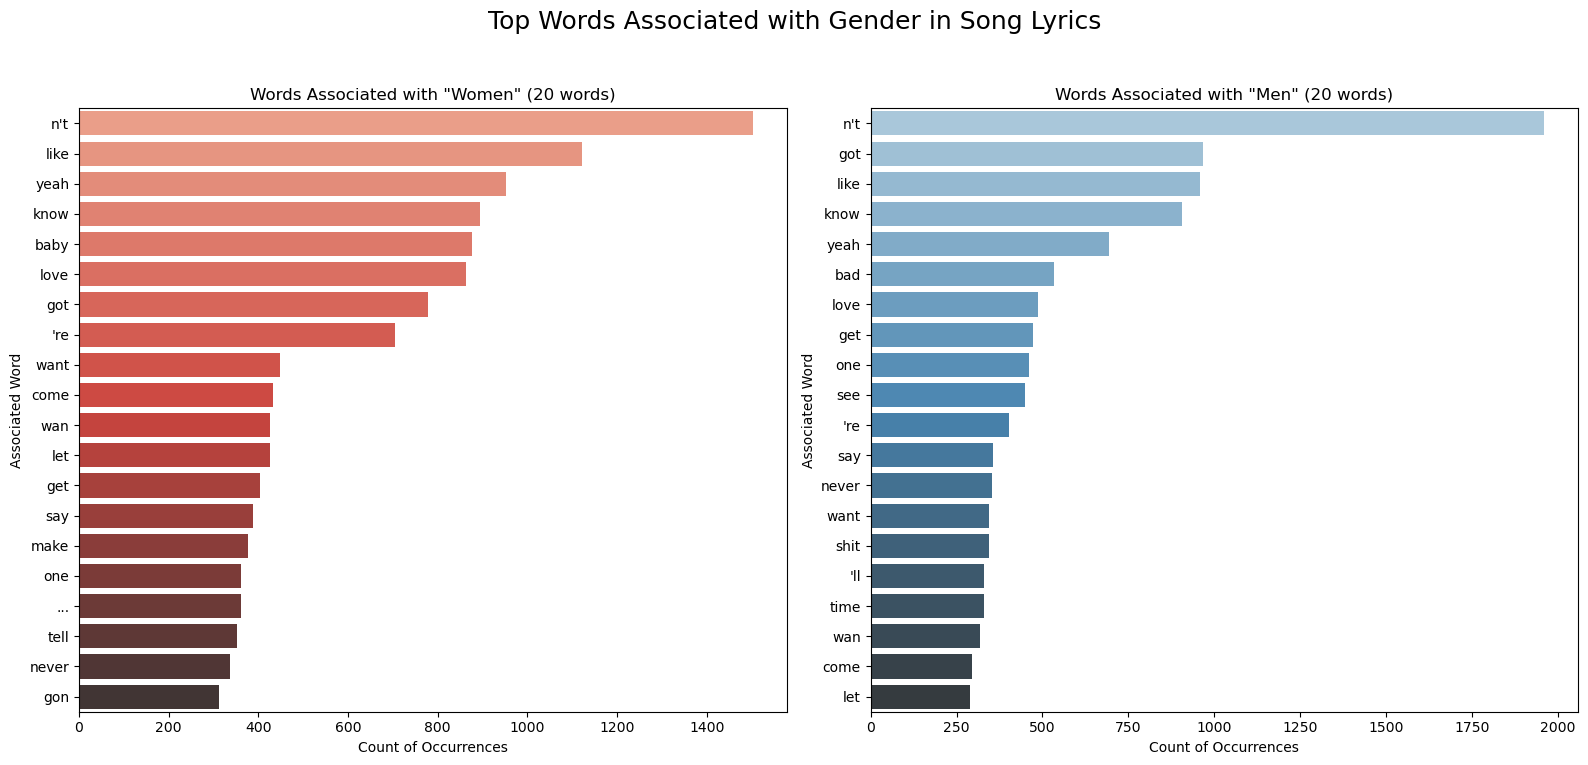

In [23]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast 


try:
    df = pd.read_csv("song_lyrics_with_ner.csv")
    df['tokens_preprocessed'] = df['tokens'].apply(eval) 
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: Could not load the CSV file. Please ensure your preprocessed CSV exists.")
    print("Make sure you have run the initial data cleaning and preprocessing steps first.")
    exit()
except KeyError:
    print("Error: Required column 'tokens_preprocessed' not found.")
    print("Please ensure your loaded CSV contains this column.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    exit()

df_filtered = df[
    (df['tokens_preprocessed'].apply(lambda x: len(x) > 0))
].copy() 

print(f"\nRemaining songs for analysis after initial filtering: {len(df_filtered)}")

if df_filtered.empty:
    print("No songs remaining after filtering for non-empty tokens. Please check your data.")
    exit()


print("\nDefining gender-related keywords and extracting contexts...")

# Keywords associated with 'women'
female_keywords = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'lady', 'ladies', 'female']
# Keywords associated with 'men'
male_keywords = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'guy', 'guys', 'male']

all_gender_keywords = set(female_keywords + male_keywords)

# How many words before and after the keyword to capture as context
context_window_size = 5 


all_female_contexts_words = []
all_male_contexts_words = []

for index, row in df_filtered.iterrows():
    tokens = row['tokens_preprocessed']
    
    for i, token in enumerate(tokens):
        if token in female_keywords:
           
            start_index = max(0, i - context_window_size)
            context_before = tokens[start_index:i]
            
            # Get words after the keyword (excluding the keyword itself)
            end_index = min(len(tokens), i + context_window_size + 1) 
            context_after = tokens[i+1:end_index]
            
            
            context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
            all_female_contexts_words.extend(context_words)
            
        elif token in male_keywords:
            start_index = max(0, i - context_window_size)
            context_before = tokens[start_index:i]
            

            end_index = min(len(tokens), i + context_window_size + 1)
            context_after = tokens[i+1:end_index]

            context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
            all_male_contexts_words.extend(context_words)

# --- 3. Count Word Frequencies in Contexts ---
print("\nCounting word frequencies in contexts...")

female_context_counts = Counter(all_female_contexts_words)
male_context_counts = Counter(all_male_contexts_words)


topn_words = 20 

top_female_context_words = female_context_counts.most_common(topn_words)
top_male_context_words = male_context_counts.most_common(topn_words)

# Results 
print("\n--- Results: Top Words Associated with 'Women' Context ---")
if top_female_context_words:
    for word, count in top_female_context_words:
        print(f"  '{word}' ({count})")
else:
    print("  No significant context words found for 'Women' keywords.")

print("\n--- Results: Top Words Associated with 'Men' Context ---")
if top_male_context_words:
    for word, count in top_male_context_words:
        print(f"  '{word}' ({count})")
else:
    print("  No significant context words found for 'Men' keywords.")

# ---  Visualization ---
print("\n--- Visualization of Context Words ---")

if top_female_context_words or top_male_context_words:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
    fig.suptitle('Top Words Associated with Gender in Song Lyrics', fontsize=18)

    # Women Context Plot
    if top_female_context_words:
        df_female_context = pd.DataFrame(top_female_context_words, columns=['word', 'count'])
        sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
        axes[0].set_title(f'Words Associated with "Women" ({len(top_female_context_words)} words)')
        axes[0].set_xlabel('Count of Occurrences')
        axes[0].set_ylabel('Associated Word')
    else:
        axes[0].text(0.5, 0.5, 'No data for "Women" context',
                     horizontalalignment='center', verticalalignment='center',
                     transform=axes[0].transAxes, fontsize=12, color='gray')
        axes[0].set_title('Words Associated with "Women"')
        axes[0].set_xticks([])
        axes[0].set_yticks([])
        axes[0].set_xlabel('')
        axes[0].set_ylabel('')

    # Men Context Plot
    if top_male_context_words:
        df_male_context = pd.DataFrame(top_male_context_words, columns=['word', 'count'])
        sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')
        axes[1].set_title(f'Words Associated with "Men" ({len(top_male_context_words)} words)')
        axes[1].set_xlabel('Count of Occurrences')
        axes[1].set_ylabel('Associated Word')
    else:
        axes[1].text(0.5, 0.5, 'No data for "Men" context',
                     horizontalalignment='center', verticalalignment='center',
                     transform=axes[1].transAxes, fontsize=12, color='gray')
        axes[1].set_title('Words Associated with "Men"')
        axes[1].set_xticks([])
        axes[1].set_yticks([])
        axes[1].set_xlabel('')
        axes[1].set_ylabel('')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("No gender-related contexts found in any songs for visualization.")

#### Time 

DataFrame loaded successfully.

Remaining songs for analysis after initial filtering: 6835
Year range in dataset: 1944 - 2020

Defining gender-related keywords and context window...

Analyzing context words per year...
Processing year: 1944...
Processing year: 1953...
Processing year: 1956...
Processing year: 1957...
Processing year: 1959...
Processing year: 1960...
Processing year: 1961...
Processing year: 1962...
Processing year: 1963...
Processing year: 1964...
Processing year: 1968...
Processing year: 1969...
Processing year: 1970...
Processing year: 1971...
Processing year: 1972...
Processing year: 1973...
Processing year: 1974...
Processing year: 1975...
Processing year: 1976...
Processing year: 1977...
Processing year: 1978...
Processing year: 1979...
Processing year: 1980...
Processing year: 1981...
Processing year: 1982...
Processing year: 1983...
Processing year: 1984...
Processing year: 1985...
Processing year: 1986...
Processing year: 1987...
Processing year: 1988...
Proces

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/318156429.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/318156429.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


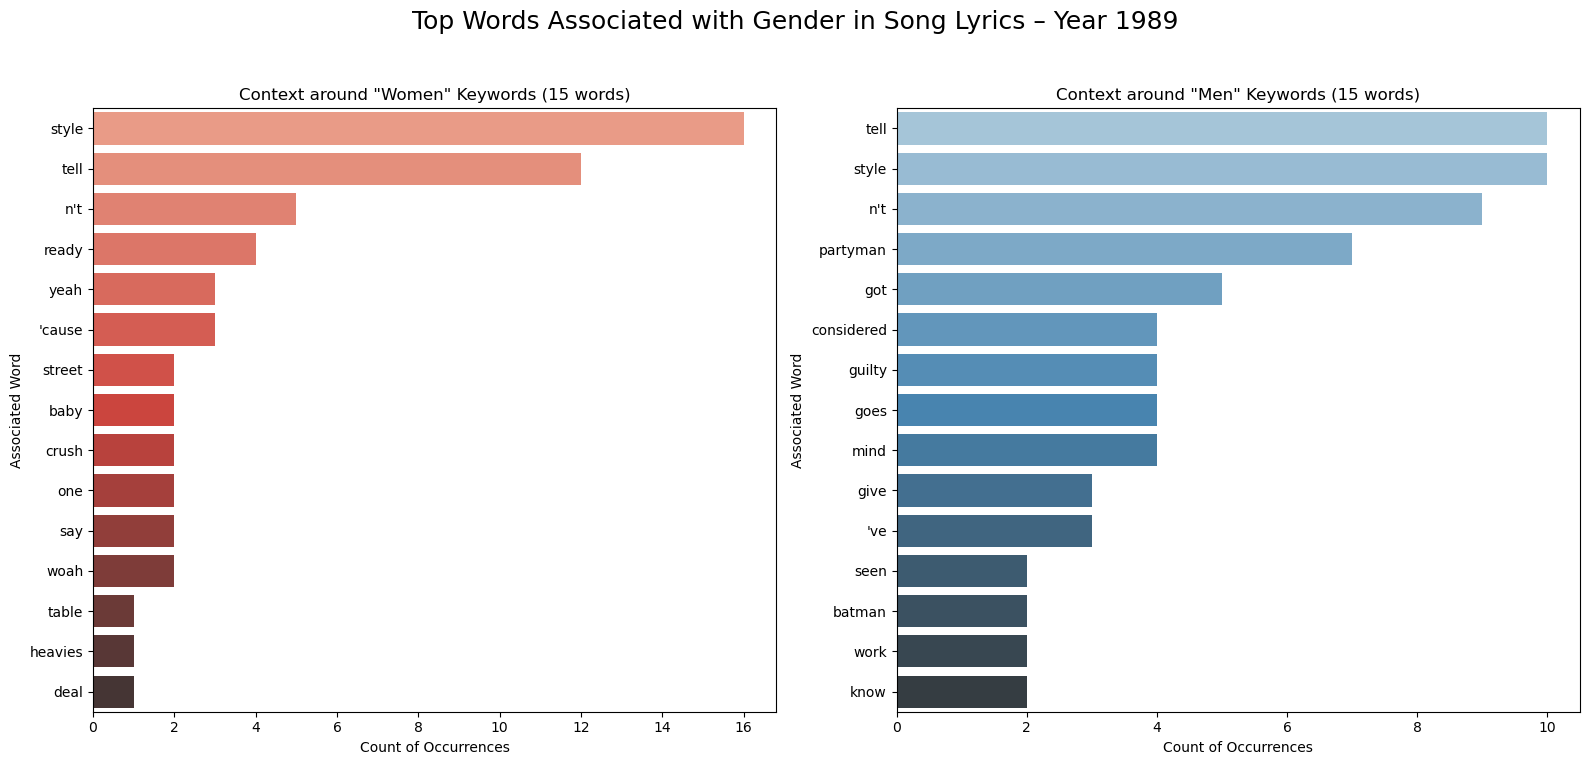

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/318156429.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/318156429.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


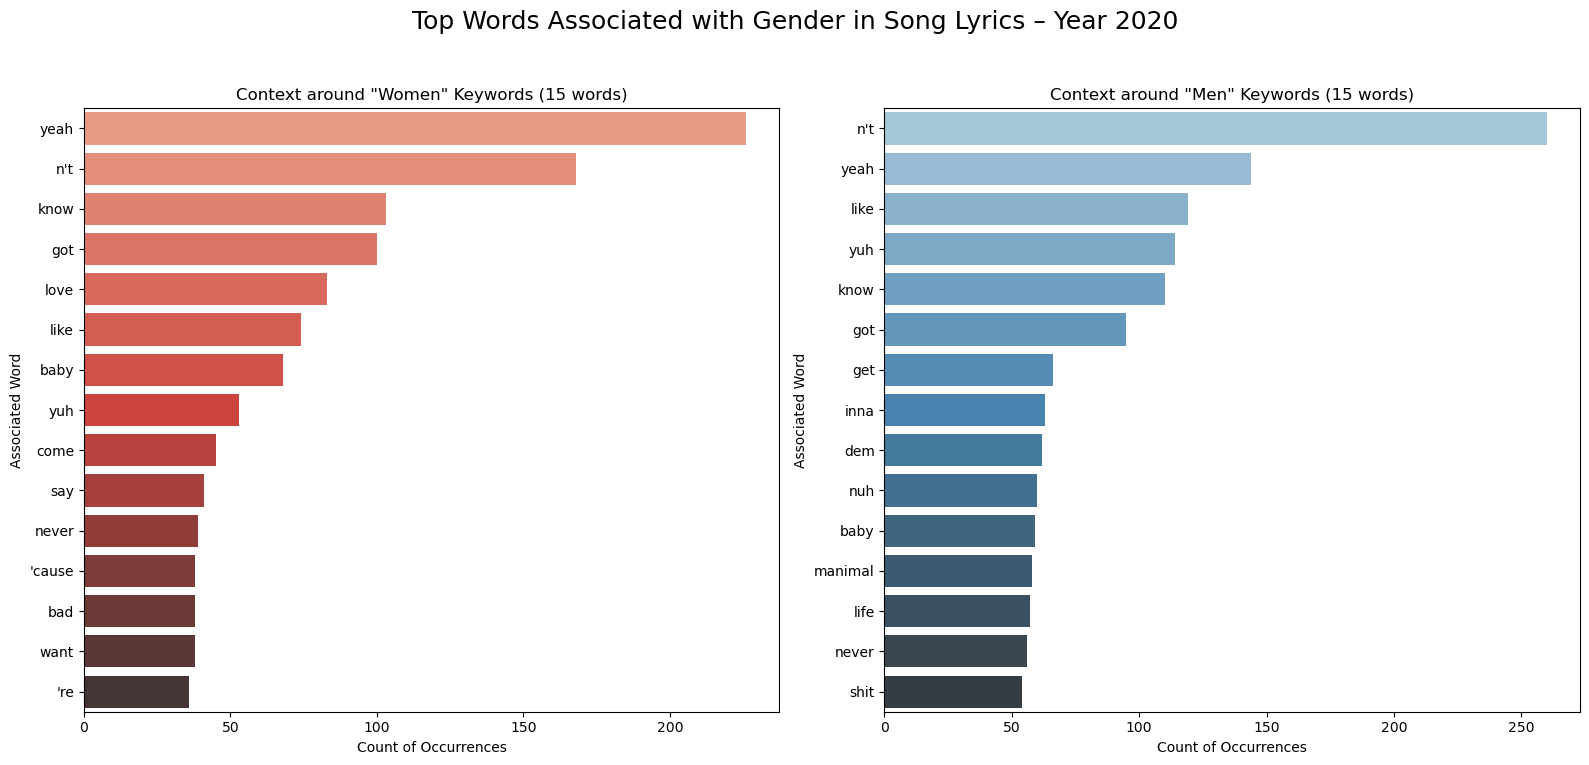

In [24]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast 


try:
    df = pd.read_csv("song_lyrics_with_ner.csv") 
    df['tokens_preprocessed'] = df['tokens'].apply(eval) 
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: Could not load the CSV file. Please ensure your preprocessed CSV exists.")
    print("Make sure you have run the initial data cleaning and preprocessing steps first.")
    exit()
except KeyError as e:
    print(f"Error: Required column not found: {e}.")
    print("Please ensure your loaded CSV contains 'tokens_preprocessed' and 'year' columns.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    exit()

# Filter data: Only songs with non-empty token lists and valid years
df_filtered = df[
    (df['tokens_preprocessed'].apply(lambda x: len(x) > 0)) &
    df['year'].notna()
].copy() 

df_filtered['year'] = df_filtered['year'].astype(int) 

print(f"\nRemaining songs for analysis after initial filtering: {len(df_filtered)}")
print(f"Year range in dataset: {df_filtered['year'].min()} - {df_filtered['year'].max()}")


if df_filtered.empty:
    print("No songs remaining after filtering for non-empty tokens and valid years. Please check your data.")
    exit()


print("\nDefining gender-related keywords and context window...")

# Keywords associated with 'women'
female_keywords = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'lady', 'ladies', 'female']
# Keywords associated with 'men'
male_keywords = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'guy', 'guys', 'male']


all_gender_keywords = set(female_keywords + male_keywords)

# How many words before and after the keyword to capture as context
context_window_size = 5 

# --- 2. Analyze Context Words per Year ---
print("\nAnalyzing context words per year...")

yearly_gender_context_top_words = {}

all_years = sorted(df_filtered['year'].unique())

for year in all_years:
    print(f"Processing year: {year}...")
    year_subset_df = df_filtered[df_filtered['year'] == year].copy()
    
    if year_subset_df.empty:
        yearly_gender_context_top_words[year] = {'female_context': [], 'male_context': []}
        continue # Skip if no songs for this year

    all_female_contexts_words_year = []
    all_male_contexts_words_year = []

    for index, row in year_subset_df.iterrows():
        tokens = row['tokens_preprocessed']
        
        for i, token in enumerate(tokens):
            if token in female_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]
                
                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                all_female_contexts_words_year.extend(context_words)
                
            elif token in male_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]

                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                all_male_contexts_words_year.extend(context_words)
    
    # Count word frequencies for the current year's contexts
    female_context_counts_year = Counter(all_female_contexts_words_year)
    male_context_counts_year = Counter(all_male_contexts_words_year)
    
    topn_words = 15
    
    yearly_gender_context_top_words[year] = {
        'female_context': female_context_counts_year.most_common(topn_words),
        'male_context': male_context_counts_year.most_common(topn_words)
    }

# --- 3. Display Results ---
print("\n--- Results: Top Words Associated with Gender Context by Year ---")
for year, data in yearly_gender_context_top_words.items():
    print(f"\nYear: {year}")
    
    female_words = data['female_context']
    if female_words:
        print(f"  Words with 'Women' Context: {', '.join([f'{word} ({count})' for word, count in female_words])}")
    else:
        print(f"  Words with 'Women' Context: (Not enough data or keywords found)")
        
    male_words = data['male_context']
    if male_words:
        print(f"  Words with 'Men' Context: {', '.join([f'{word} ({count})' for word, count in male_words])}")
    else:
        print(f"  Words with 'Men' Context: (Not enough data or keywords found)")

# --- 4. Optional: Visualization for Selected Years ---
print("\n--- Visualizing Context Words for Selected Years ---")


years_to_visualize = []
if len(all_years) >= 3:
    years_to_visualize = [all_years[0], all_years[len(all_years)//2], all_years[-1]]
else:
    years_to_visualize = all_years 

for year in years_to_visualize:
    if year in yearly_gender_context_top_words:
        female_data = yearly_gender_context_top_words[year]['female_context']
        male_data = yearly_gender_context_top_words[year]['male_context']

        has_female_data = bool(female_data)
        has_male_data = bool(male_data)

        if has_female_data or has_male_data:
            fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
            fig.suptitle(f'Top Words Associated with Gender in Song Lyrics – Year {year}', fontsize=18)

            # Female Context Plot
            if has_female_data:
                df_female_context = pd.DataFrame(female_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
                axes[0].set_title(f'Context around "Women" Keywords ({len(female_data)} words)')
                axes[0].set_xlabel('Count of Occurrences')
                axes[0].set_ylabel('Associated Word')
            else:
                axes[0].text(0.5, 0.5, 'No data for "Women" context in this year',
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[0].transAxes, fontsize=12, color='gray')
                axes[0].set_title('Context around "Women" Keywords')
                axes[0].set_xticks([])
                axes[0].set_yticks([])
                axes[0].set_xlabel('')
                axes[0].set_ylabel('')

            # Male Context Plot
            if has_male_data:
                df_male_context = pd.DataFrame(male_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')
                axes[1].set_title(f'Context around "Men" Keywords ({len(male_data)} words)')
                axes[1].set_xlabel('Count of Occurrences')
                axes[1].set_ylabel('Associated Word')
            else:
                axes[1].text(0.5, 0.5, 'No data for "Men" context in this year',
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[1].transAxes, fontsize=12, color='gray')
                axes[1].set_title('Context around "Men" Keywords')
                axes[1].set_xticks([])
                axes[1].set_yticks([])
                axes[1].set_xlabel('')
                axes[1].set_ylabel('')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
        else:
            print(f"  Skipping visualization for Year: {year} (no gender-related context found).")
    else:
        print(f"  No data for year {year} to visualize.")

DataFrame loaded successfully.

Remaining songs for analysis after initial filtering: 6835
Year range in dataset: 1944 - 2020
Decades covered: [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

Defining gender-related keywords and context window...

Analyzing context words per decade...
Processing decade: 1940s...
Processing decade: 1950s...
Processing decade: 1960s...
Processing decade: 1970s...
Processing decade: 1980s...
Processing decade: 1990s...
Processing decade: 2000s...
Processing decade: 2010s...
Processing decade: 2020s...

--- Results: Top Words Associated with Gender Context by Decade ---

Decade: 1940s
  Words with 'Women' Context: (Not enough data or keywords found)
  Words with 'Men' Context: (Not enough data or keywords found)

Decade: 1950s
  Words with 'Women' Context: love (8), may (7), got (5), christmas (4), know (3), little (3), true (2), make (2), way (2), mercy (2), please (2), n't (2), take (2), advantage (2), well (2)
  Words with 'Men' Context: without 

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2039907219.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2039907219.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


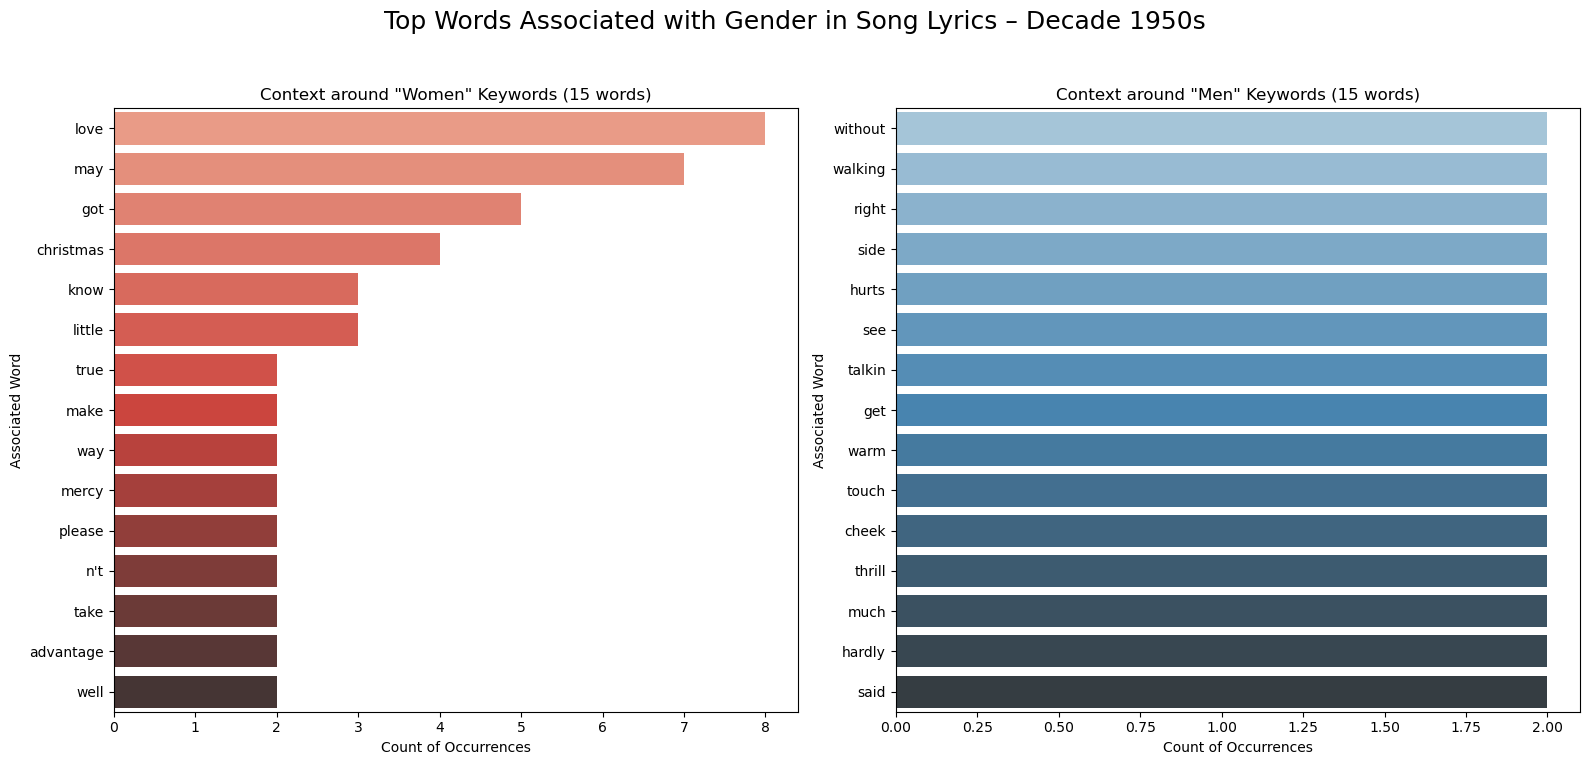

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2039907219.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2039907219.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


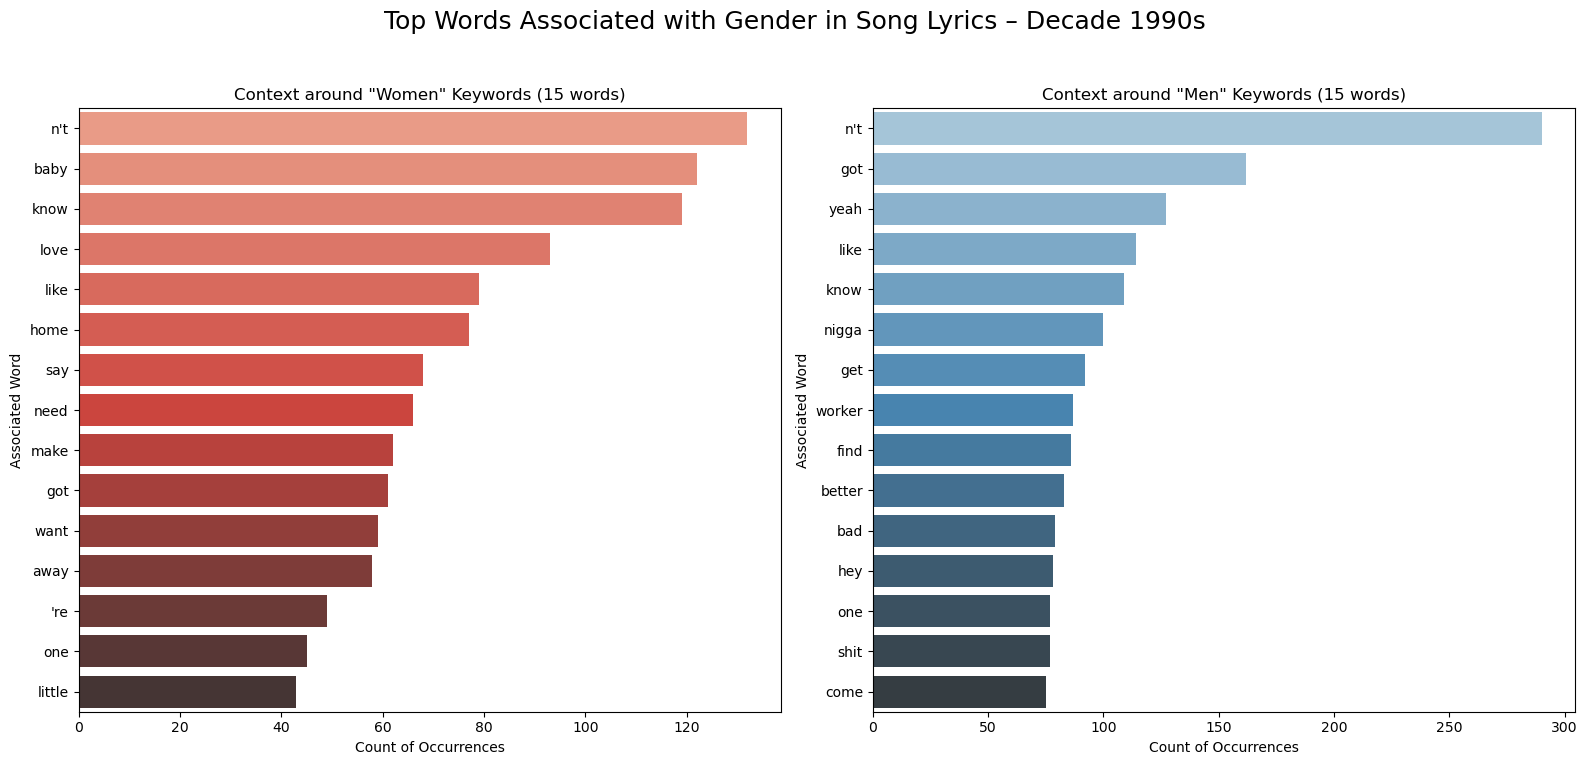

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2039907219.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2039907219.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


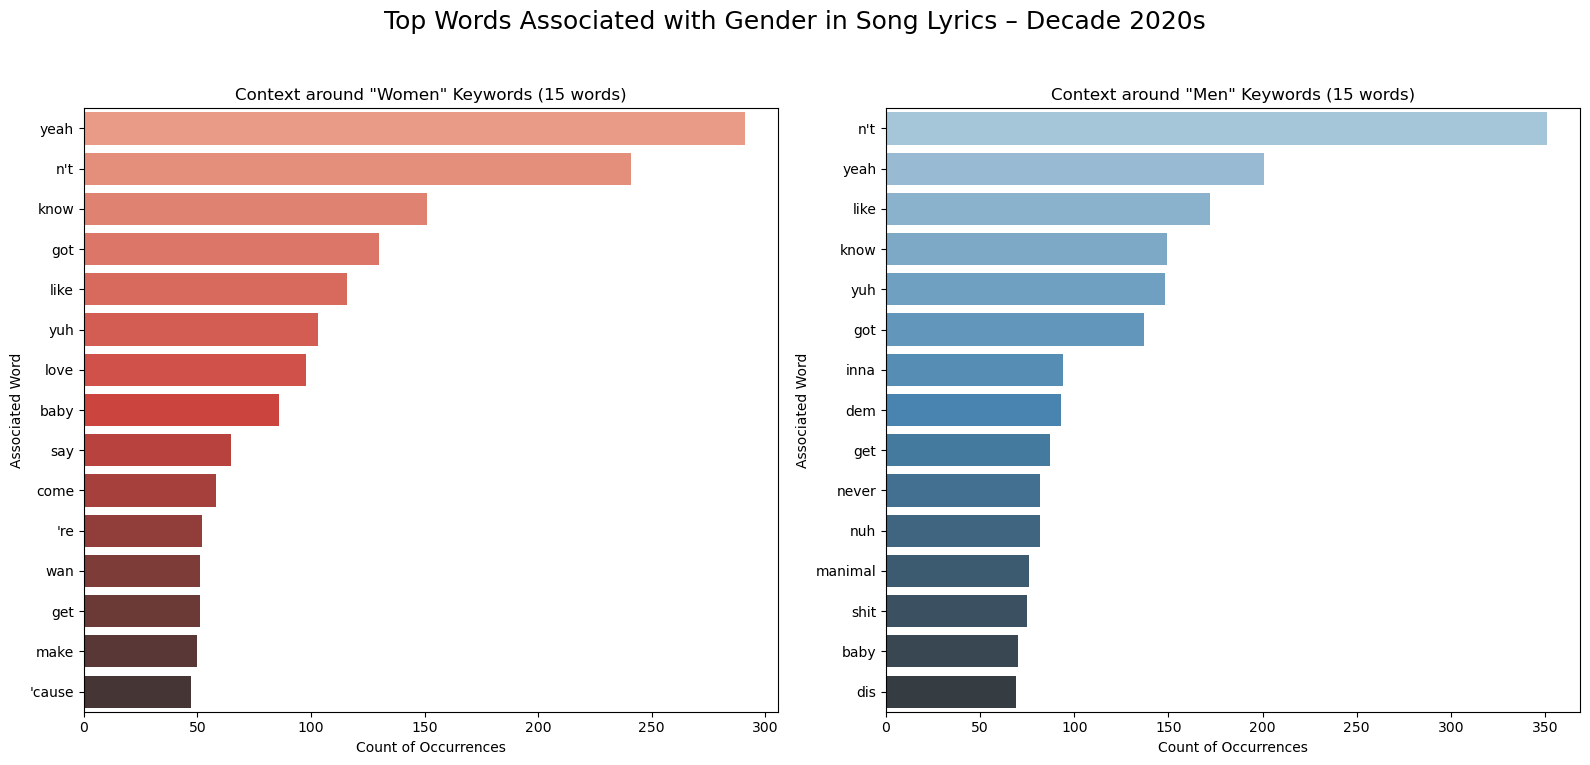

In [25]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

try:
    df = pd.read_csv("song_lyrics_with_ner.csv") 
    df['tokens_preprocessed'] = df['tokens'].apply(ast.literal_eval) 
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: Could not load the CSV file. Please ensure your preprocessed CSV exists.")
    print("Make sure you have run the initial data cleaning and preprocessing steps first.")
    exit()
except KeyError as e:
    print(f"Error: Required column not found: {e}.")
    print("Please ensure your loaded CSV contains 'tokens_preprocessed' and 'year' columns.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    exit()

#  Only songs with non-empty token lists and valid years
df_filtered = df[
    (df['tokens_preprocessed'].apply(lambda x: len(x) > 0)) &
    df['year'].notna()
].copy() 

df_filtered['year'] = df_filtered['year'].astype(int) 

# 'decade' column
df_filtered['decade'] = (df_filtered['year'] // 10) * 10
print(f"\nRemaining songs for analysis after initial filtering: {len(df_filtered)}")
print(f"Year range in dataset: {df_filtered['year'].min()} - {df_filtered['year'].max()}")
print(f"Decades covered: {sorted(df_filtered['decade'].unique())}")


if df_filtered.empty:
    print("No songs remaining after filtering for non-empty tokens and valid years. Please check your data.")
    exit()


print("\nDefining gender-related keywords and context window...")

# Keywords associated with 'women'
female_keywords = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'lady', 'ladies', 'female']
# Keywords associated with 'men'
male_keywords = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'guy', 'guys', 'male']


all_gender_keywords = set(female_keywords + male_keywords)

context_window_size = 7 

# --- 2. Analyze Context Words per Decade ---
print("\nAnalyzing context words per decade...")

decade_female_contexts_words = Counter()
decade_male_contexts_words = Counter()


decade_gender_context_top_words = {}

all_decades = sorted(df_filtered['decade'].unique())

for decade in all_decades:
    print(f"Processing decade: {decade}s...")
    decade_subset_df = df_filtered[df_filtered['decade'] == decade].copy()
    
    if decade_subset_df.empty:
        decade_gender_context_top_words[decade] = {'female_context': [], 'male_context': []}
        continue 

    
    current_decade_female_words = Counter()
    current_decade_male_words = Counter()

    for index, row in decade_subset_df.iterrows():
        tokens = row['tokens_preprocessed']
        
        for i, token in enumerate(tokens):
            if token in female_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]
                
                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                current_decade_female_words.update(context_words) # Use update for Counter
                
            elif token in male_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]

                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                current_decade_male_words.update(context_words) 
    
    topn_words = 15 
    
    decade_gender_context_top_words[decade] = {
        'female_context': current_decade_female_words.most_common(topn_words),
        'male_context': current_decade_male_words.most_common(topn_words)
    }

# --- 3. Display Results ---
print("\n--- Results: Top Words Associated with Gender Context by Decade ---")
for decade, data in decade_gender_context_top_words.items():
    print(f"\nDecade: {decade}s")
    
    female_words = data['female_context']
    if female_words:
        print(f"  Words with 'Women' Context: {', '.join([f'{word} ({count})' for word, count in female_words])}")
    else:
        print(f"  Words with 'Women' Context: (Not enough data or keywords found)")
        
    male_words = data['male_context']
    if male_words:
        print(f"  Words with 'Men' Context: {', '.join([f'{word} ({count})' for word, count in male_words])}")
    else:
        print(f"  Words with 'Men' Context: (Not enough data or keywords found)")

# ---  Visualization for Selected Decades ---
print("\n--- Visualizing Context Words for Selected Decades ---")


decades_to_visualize = []
if len(all_decades) >= 3:

    valid_decades = [d for d, data in decade_gender_context_top_words.items() if data['female_context'] or data['male_context']]
    if len(valid_decades) >= 3:
        decades_to_visualize = [valid_decades[0], valid_decades[len(valid_decades)//2], valid_decades[-1]]
    else:
        decades_to_visualize = valid_decades 
else:
    decades_to_visualize = all_decades 

for decade in decades_to_visualize:
    if decade in decade_gender_context_top_words:
        female_data = decade_gender_context_top_words[decade]['female_context']
        male_data = decade_gender_context_top_words[decade]['male_context']

        has_female_data = bool(female_data)
        has_male_data = bool(male_data)

        if has_female_data or has_male_data:
            fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
            fig.suptitle(f'Top Words Associated with Gender in Song Lyrics – Decade {decade}s', fontsize=18)

            # Female Context Plot
            if has_female_data:
                df_female_context = pd.DataFrame(female_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
                axes[0].set_title(f'Context around "Women" Keywords ({len(female_data)} words)')
                axes[0].set_xlabel('Count of Occurrences')
                axes[0].set_ylabel('Associated Word')
            else:
                axes[0].text(0.5, 0.5, 'No data for "Women" context in this decade',
                                     horizontalalignment='center', verticalalignment='center',
                                     transform=axes[0].transAxes, fontsize=12, color='gray')
                axes[0].set_title('Context around "Women" Keywords')
                axes[0].set_xticks([])
                axes[0].set_yticks([])
                axes[0].set_xlabel('')
                axes[0].set_ylabel('')

            # Male Context Plot
            if has_male_data:
                df_male_context = pd.DataFrame(male_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')
                axes[1].set_title(f'Context around "Men" Keywords ({len(male_data)} words)')
                axes[1].set_xlabel('Count of Occurrences')
                axes[1].set_ylabel('Associated Word')
            else:
                axes[1].text(0.5, 0.5, 'No data for "Men" context in this decade',
                                     horizontalalignment='center', verticalalignment='center',
                                     transform=axes[1].transAxes, fontsize=12, color='gray')
                axes[1].set_title('Context around "Men" Keywords')
                axes[1].set_xticks([])
                axes[1].set_yticks([])
                axes[1].set_xlabel('')
                axes[1].set_ylabel('')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
        else:
            print(f"  Skipping visualization for Decade: {decade}s (no gender-related context found).")
    else:
        print(f"  No data for decade {decade}s to visualize.")

### Genre

DataFrame loaded successfully.

Initial songs for analysis after filtering: 6835
Unique raw artist_genres entries before expansion: 535 entries
Example raw artist_genres entries: ["['brazilian pop', 'funk pop', 'funk carioca', 'funk', 'pagode baiano']"
 "['modern rock']"
 "['pagode', 'brazilian pop', 'funk pop', 'pagode baiano', 'funk', 'funk carioca', 'samba']"
 "['brazilian bass', 'electronic', 'electro']"
 "['brazilian pop', 'funk pop', 'tecnobrega']"]...

Songs after expanding for all associated genres: 16023
Unique associated genres: 394 genres
Example associated genres: ['brazilian pop' 'funk pop' 'funk carioca' 'funk' 'pagode baiano']...

Analyzing top 5 most frequent associated genres: ['reggae', 'rap', 'roots reggae', 'ragga', 'opm']

Defining gender-related keywords and context window...

Analyzing context words per genre...
Processing genre: opm...
Processing genre: ragga...
Processing genre: rap...
Processing genre: reggae...
Processing genre: roots reggae...

--- Results: 

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


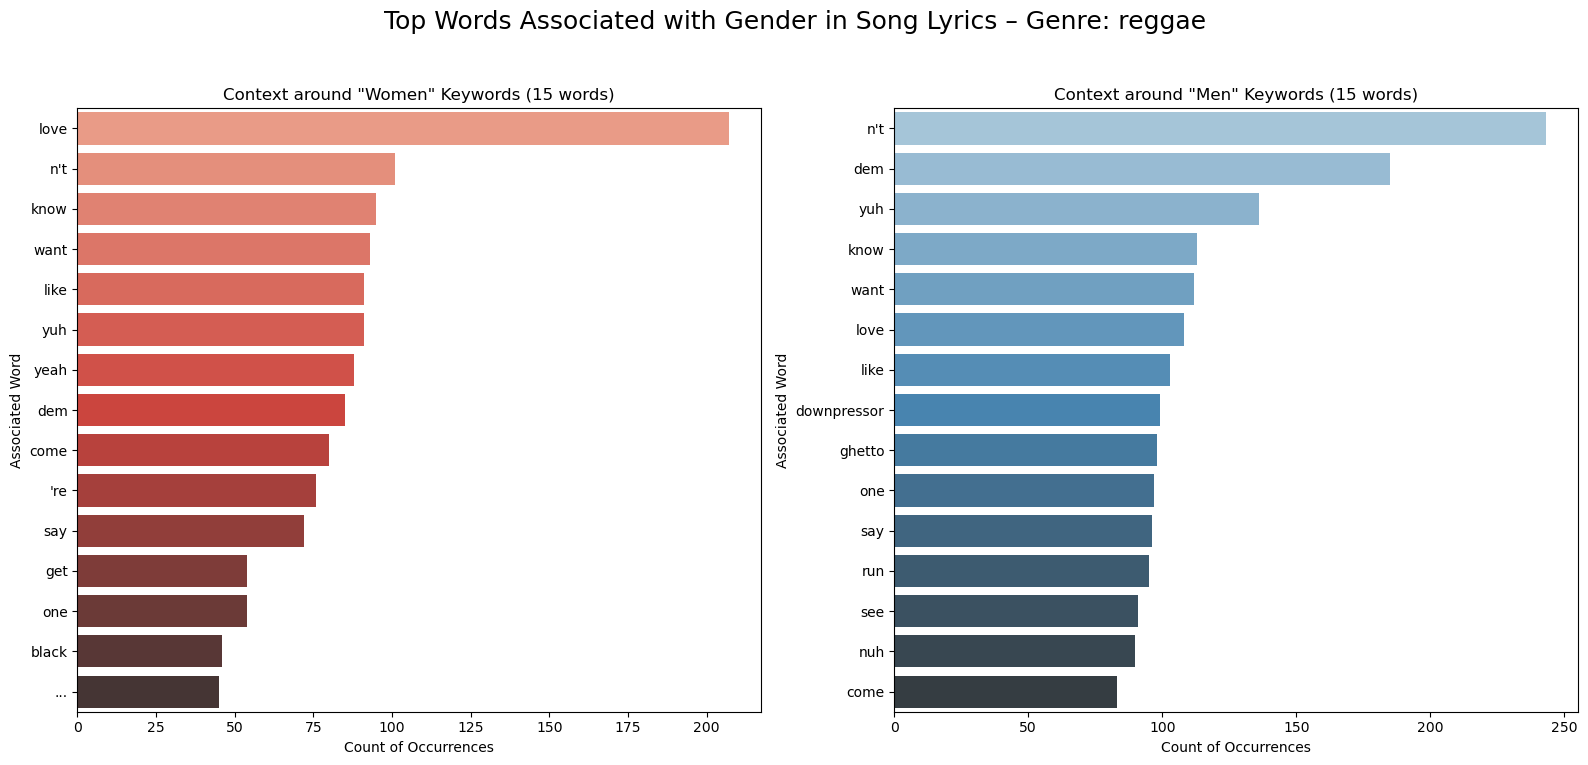

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


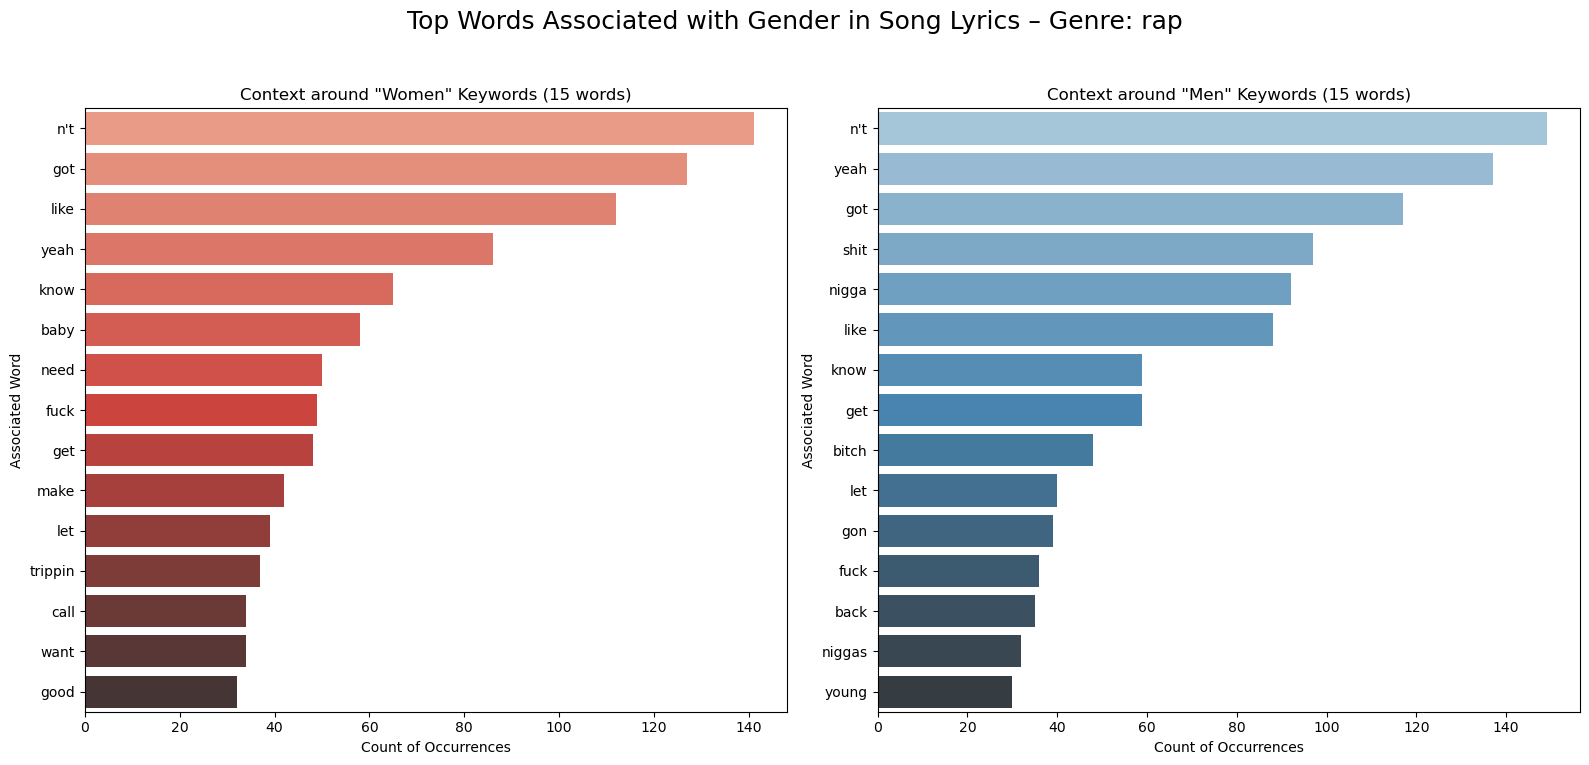

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


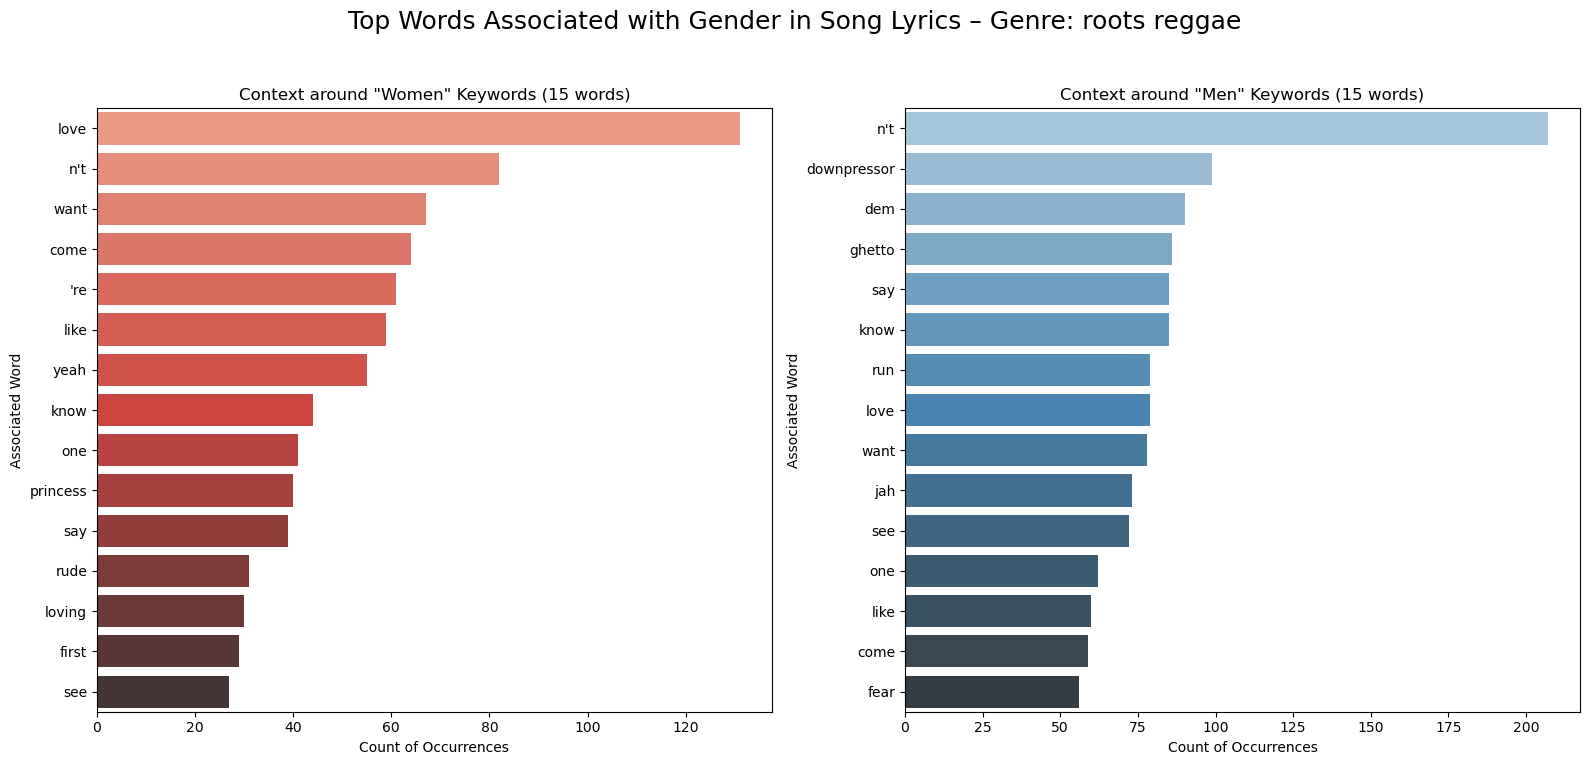

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


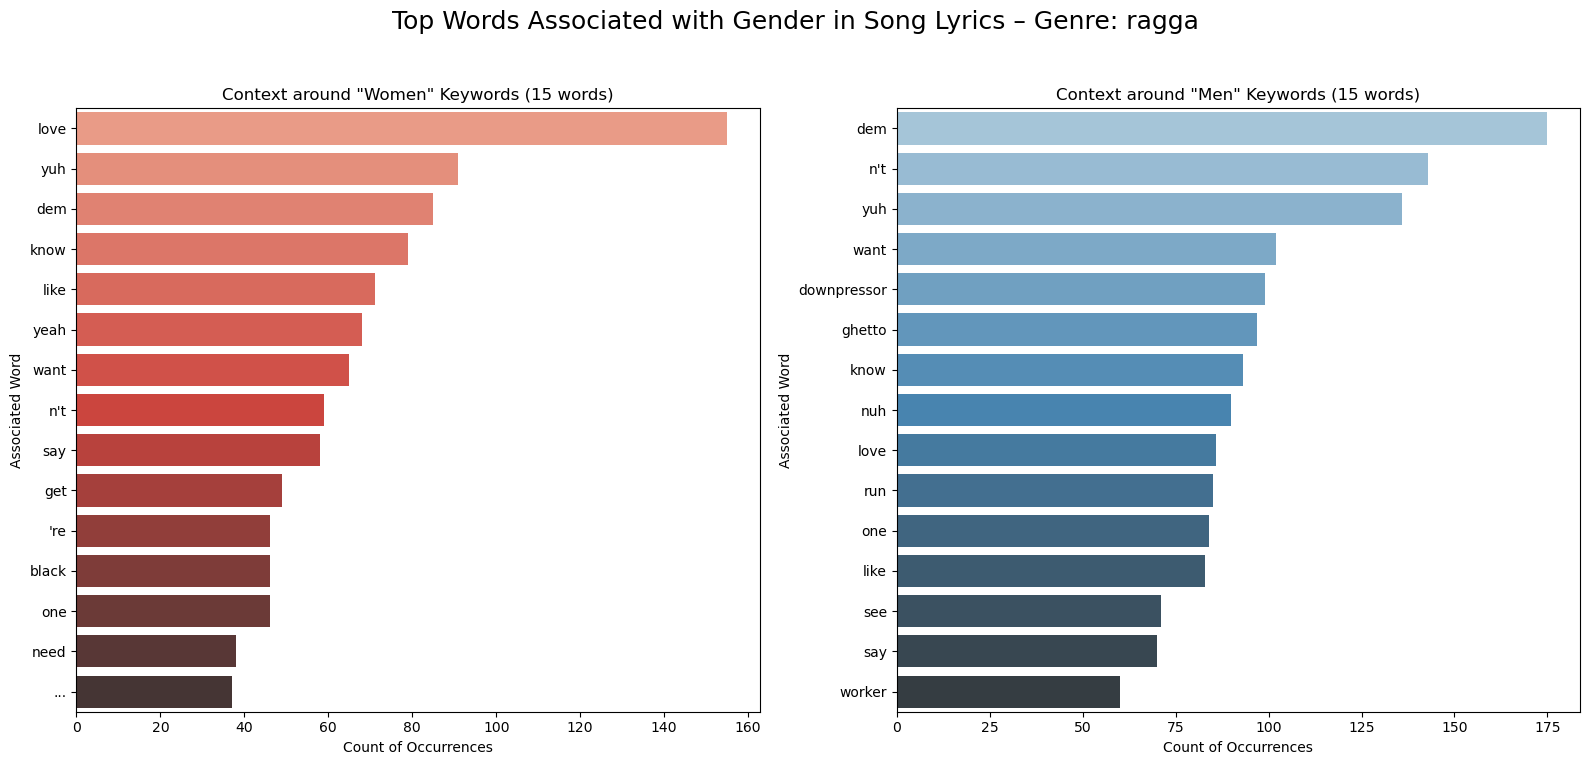

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/2903874798.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


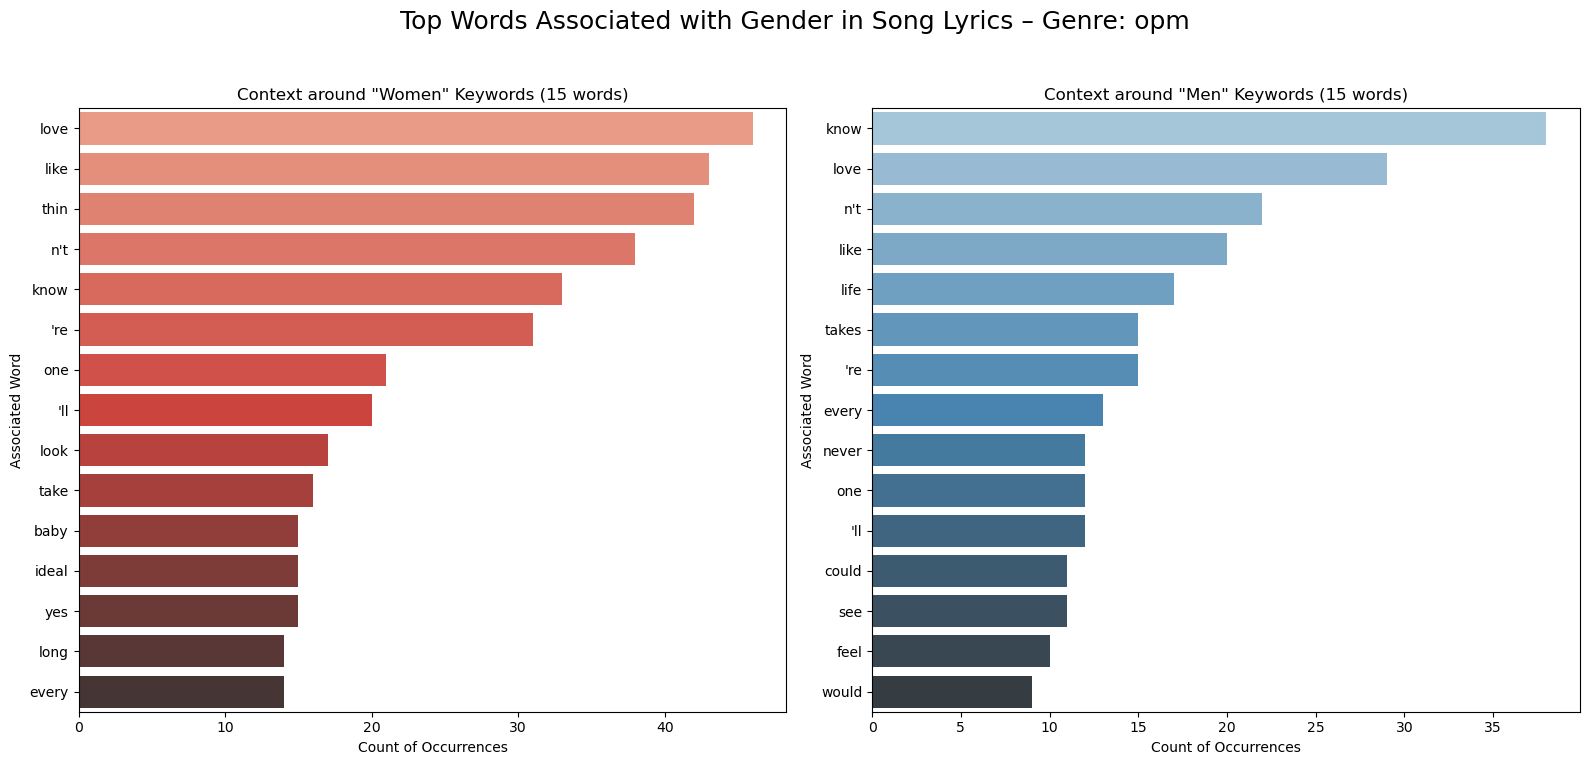

In [26]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast 


try:
    df = pd.read_csv("song_lyrics_with_ner.csv")
    df['tokens_preprocessed'] = df['tokens'].apply(eval)
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: Could not load the CSV file. Please ensure your preprocessed CSV exists.")
    print("Make sure you have run the initial data cleaning and preprocessing steps first.")
    exit()
except KeyError as e:
    print(f"Error: Required column not found: {e}.")
    print("Please ensure your loaded CSV contains 'tokens_preprocessed' and 'artist_genres' columns.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    exit()

# Only songs with non-empty token lists and valid artist_genres
df_filtered = df[
    (df['tokens_preprocessed'].apply(lambda x: len(x) > 0)) &
    df['artist_genres'].notna()
].copy() 

print(f"\nInitial songs for analysis after filtering: {len(df_filtered)}")
print(f"Unique raw artist_genres entries before expansion: {df_filtered['artist_genres'].nunique()} entries")
print(f"Example raw artist_genres entries: {df_filtered['artist_genres'].unique()[:5]}...")

if df_filtered.empty:
    print("No songs remaining after initial filtering. Please check your data and filter criteria.")
    exit()



def safe_list_eval_genre(value):
    if pd.isna(value):
        return []
    if isinstance(value, list):
        return value
    if isinstance(value, str):
        try: 
            evaluated = ast.literal_eval(value)
            if isinstance(evaluated, list):
                return [g.strip() for g in evaluated if g.strip()]
            return [value.strip()] 
        except (ValueError, SyntaxError):
           
            if ',' in value:
                return [g.strip() for g in value.split(',') if g.strip()]
            return [value.strip()] 
    return [str(value).strip()] 

df_filtered['genre_list'] = df_filtered['artist_genres'].apply(safe_list_eval_genre)


df_exploded = df_filtered.explode('genre_list').copy()


df_exploded = df_exploded[df_exploded['genre_list'].apply(lambda x: x is not None and x != '')].copy()


df_exploded.rename(columns={'genre_list': 'associated_genre'}, inplace=True)

print(f"\nSongs after expanding for all associated genres: {len(df_exploded)}")
print(f"Unique associated genres: {df_exploded['associated_genre'].nunique()} genres")
print(f"Example associated genres: {df_exploded['associated_genre'].unique()[:5]}...")


top_n_genres = 5 
if top_n_genres is not None:
    frequent_genres = df_exploded['associated_genre'].value_counts().nlargest(top_n_genres).index.tolist()
    df_analysis = df_exploded[df_exploded['associated_genre'].isin(frequent_genres)].copy()
    print(f"\nAnalyzing top {top_n_genres} most frequent associated genres: {frequent_genres}")
else:
    df_analysis = df_exploded.copy()
    print("\nAnalyzing all available associated genres.")

if df_analysis.empty:
    print("No songs remaining after filtering by associated genres. Please check your data.")
    exit()


print("\nDefining gender-related keywords and context window...")

# Keywords associated with 'women'
female_keywords = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'lady', 'ladies', 'female']
# Keywords associated with 'men'
male_keywords = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'guy', 'guys', 'male']


all_gender_keywords = set(female_keywords + male_keywords)


context_window_size = 5 

# ---  Context Words per Genre ---
print("\nAnalyzing context words per genre...")


genre_gender_context_top_words = {}

all_genres_to_analyze = sorted(df_analysis['associated_genre'].unique())

for genre in all_genres_to_analyze:
    print(f"Processing genre: {genre}...")
    genre_subset_df = df_analysis[df_analysis['associated_genre'] == genre].copy()
    
    if genre_subset_df.empty:
        genre_gender_context_top_words[genre] = {'female_context': [], 'male_context': []}
        continue 

    all_female_contexts_words_genre = []
    all_male_contexts_words_genre = []

    for index, row in genre_subset_df.iterrows():
        tokens = row['tokens_preprocessed']
        
        for i, token in enumerate(tokens):
            if token in female_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]
                
                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                all_female_contexts_words_genre.extend(context_words)
                
            elif token in male_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]

                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                all_male_contexts_words_genre.extend(context_words)
    
    #  word frequencies for the current genre's contexts
    female_context_counts_genre = Counter(all_female_contexts_words_genre)
    male_context_counts_genre = Counter(all_male_contexts_words_genre)
    
    topn_words = 15 
    
    genre_gender_context_top_words[genre] = {
        'female_context': female_context_counts_genre.most_common(topn_words),
        'male_context': male_context_counts_genre.most_common(topn_words)
    }

# --- 3. Display Results ---
print("\n--- Results: Top Words Associated with Gender Context by Genre ---")
for genre, data in genre_gender_context_top_words.items():
    print(f"\nGenre: {genre}")
    
    female_words = data['female_context']
    if female_words:
        print(f"  Words with 'Women' Context: {', '.join([f'{word} ({count})' for word, count in female_words])}")
    else:
        print(f"  Words with 'Women' Context: (Not enough data or keywords found)")
        
    male_words = data['male_context']
    if male_words:
        print(f"  Words with 'Men' Context: {', '.join([f'{word} ({count})' for word, count in male_words])}")
    else:
        print(f"  Words with 'Men' Context: (Not enough data or keywords found)")

# --- Visualization for Selected Genres ---
print("\n--- Visualizing Context Words for Selected Genres ---")


genres_to_visualize = frequent_genres if 'frequent_genres' in locals() else all_genres_to_analyze 

for genre in genres_to_visualize:
    if genre in genre_gender_context_top_words:
        female_data = genre_gender_context_top_words[genre]['female_context']
        male_data = genre_gender_context_top_words[genre]['male_context']

        has_female_data = bool(female_data)
        has_male_data = bool(male_data)

        if has_female_data or has_male_data:
            fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
            fig.suptitle(f'Top Words Associated with Gender in Song Lyrics – Genre: {genre}', fontsize=18)

            # Female Context Plot
            if has_female_data:
                df_female_context = pd.DataFrame(female_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
                axes[0].set_title(f'Context around "Women" Keywords ({len(female_data)} words)')
                axes[0].set_xlabel('Count of Occurrences')
                axes[0].set_ylabel('Associated Word')
            else:
                axes[0].text(0.5, 0.5, 'No data for "Women" context in this genre',
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[0].transAxes, fontsize=12, color='gray')
                axes[0].set_title('Context around "Women" Keywords')
                axes[0].set_xticks([])
                axes[0].set_yticks([])
                axes[0].set_xlabel('')
                axes[0].set_ylabel('')

            # Male Context Plot
            if has_male_data:
                df_male_context = pd.DataFrame(male_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')
                axes[1].set_title(f'Context around "Men" Keywords ({len(male_data)} words)')
                axes[1].set_xlabel('Count of Occurrences')
                axes[1].set_ylabel('Associated Word')
            else:
                axes[1].text(0.5, 0.5, 'No data for "Men" context in this genre',
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[1].transAxes, fontsize=12, color='gray')
                axes[1].set_title('Context around "Men" Keywords')
                axes[1].set_xticks([])
                axes[1].set_yticks([])
                axes[1].set_xlabel('')
                axes[1].set_ylabel('')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
        else:
            print(f"  Skipping visualization for Genre: {genre} (no gender-related context found).")
    else:
        print(f"  No data for genre {genre} to visualize.")

### Country level

DataFrame loaded successfully.

Initial songs for analysis after filtering: 6835
Unique raw country entries before expansion: 18 entries
Example raw country entries: ['BR' 'CA' 'DE' 'ES' 'FI']...

Songs after expanding for all associated countries: 6835
Unique associated countries: 18 countries
Example associated countries: ['BR' 'CA' 'DE' 'ES' 'FI']...

Analyzing top 5 most frequent associated countries: ['US', 'CA', 'JM', 'GB', 'JP']

Defining gender-related keywords and context window...

Analyzing context words per country...
Processing country: CA...
Processing country: GB...
Processing country: JM...
Processing country: JP...
Processing country: US...

--- Results: Top Words Associated with Gender Context by Country ---

Country: CA
  Words with 'Women' Context: n't (133), shake (119), know (104), love (69), never (65), got (61), 're (54), like (52), baby (51), goodbye (50), country (47), 'll (42), yeah (39), ... (35), 've (34)
  Words with 'Men' Context: n't (240), better (115),

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


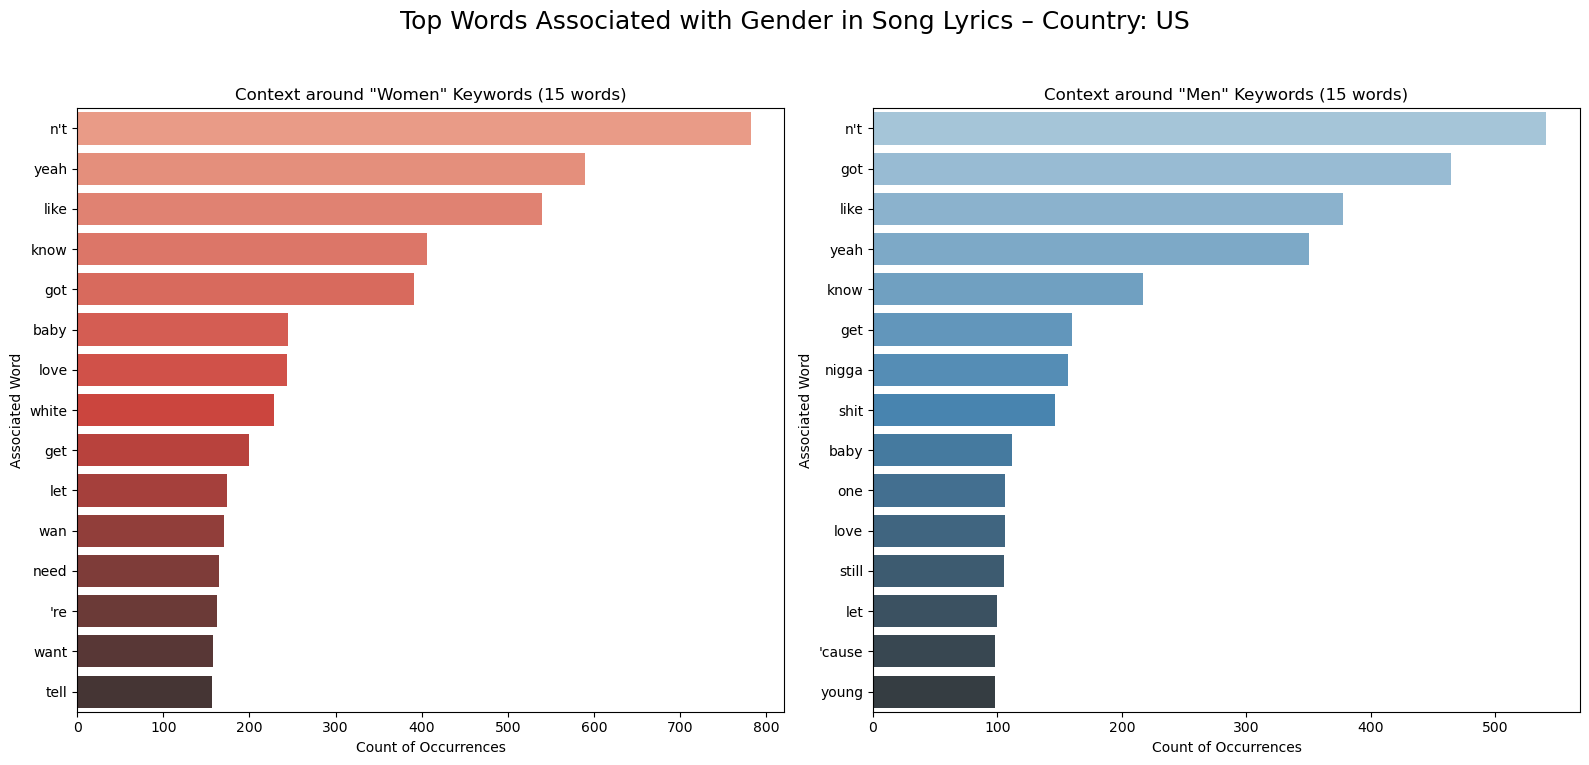

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


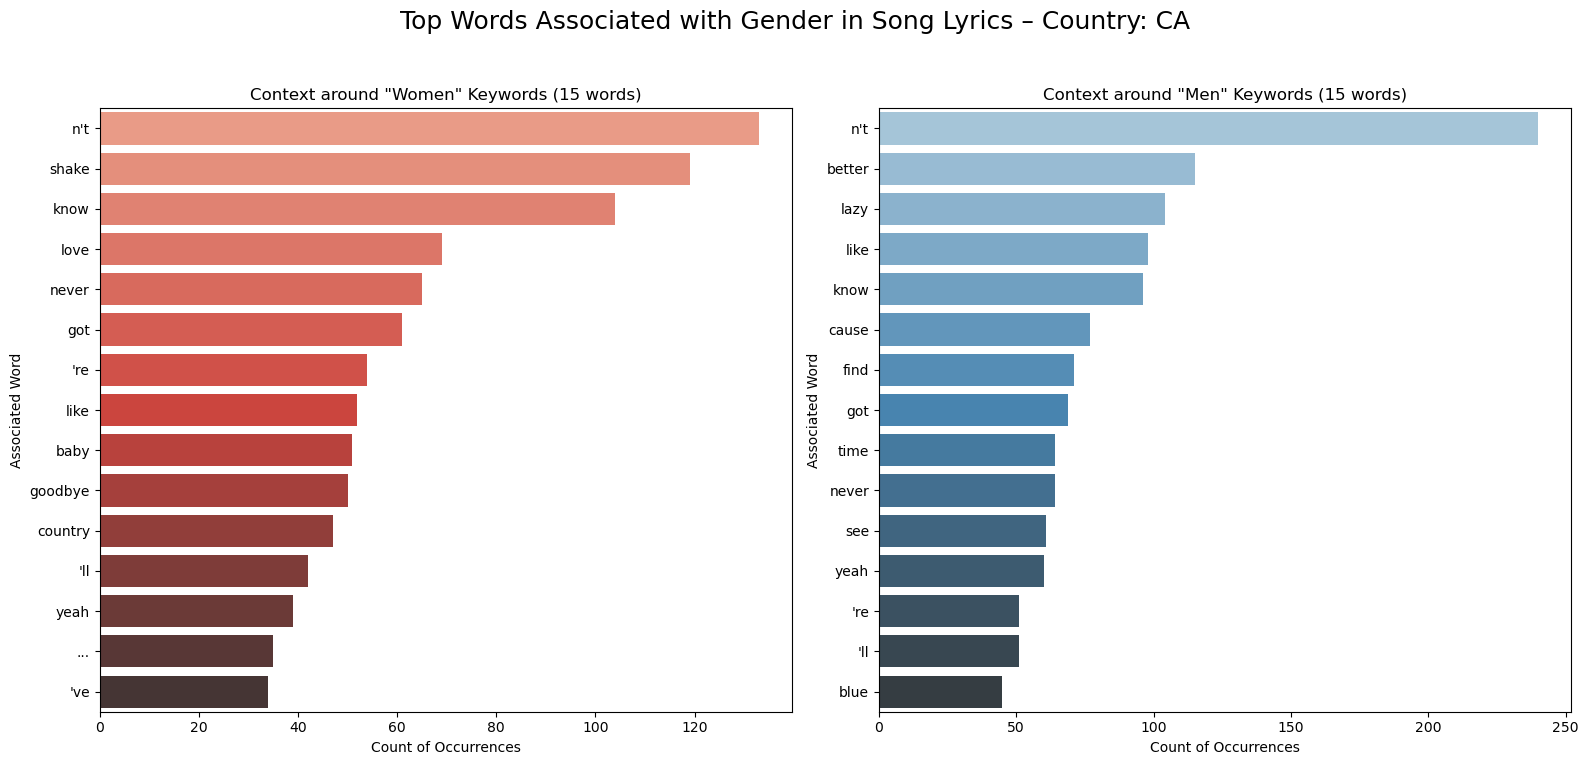

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


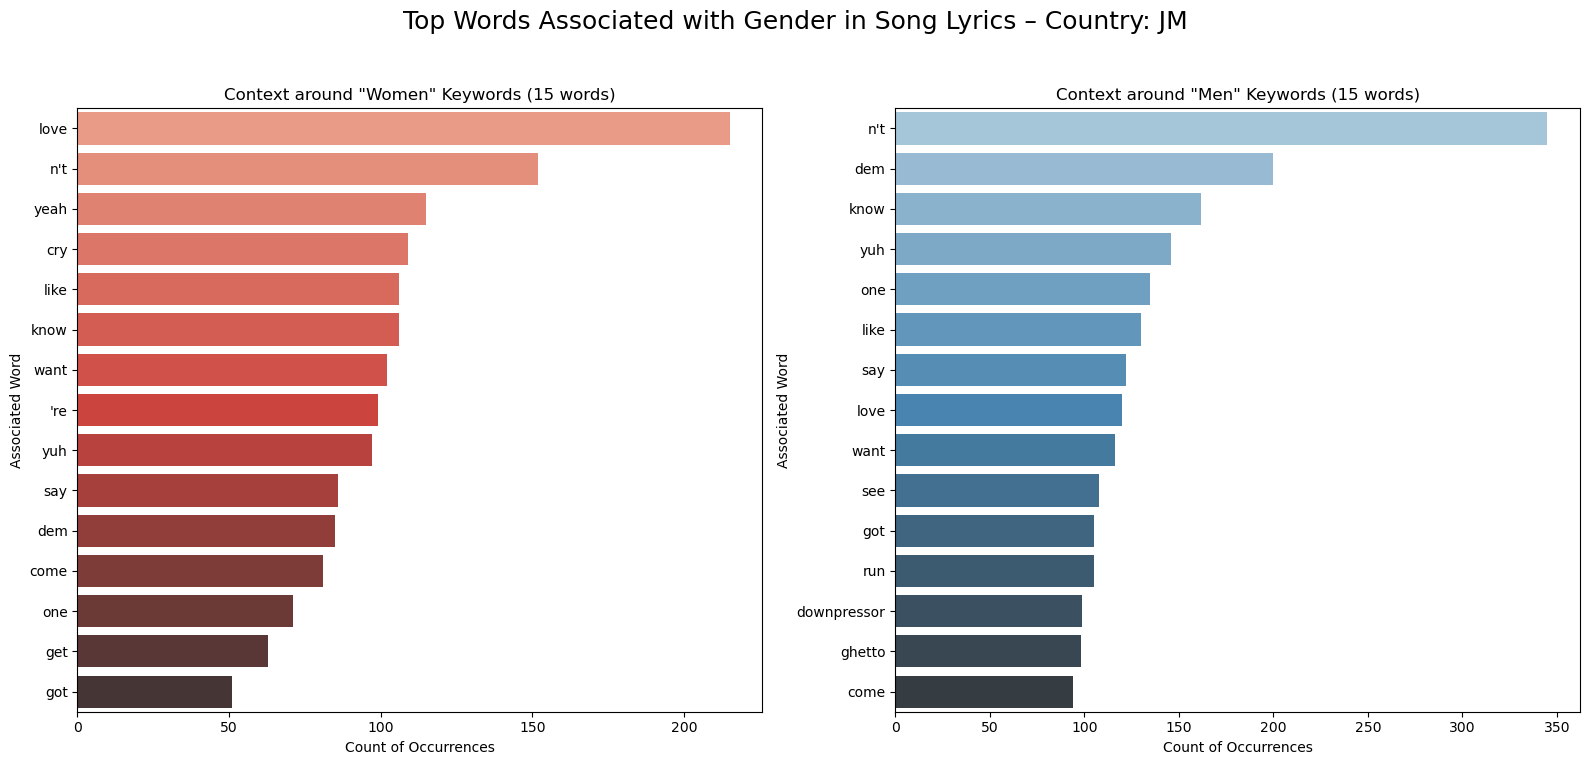

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


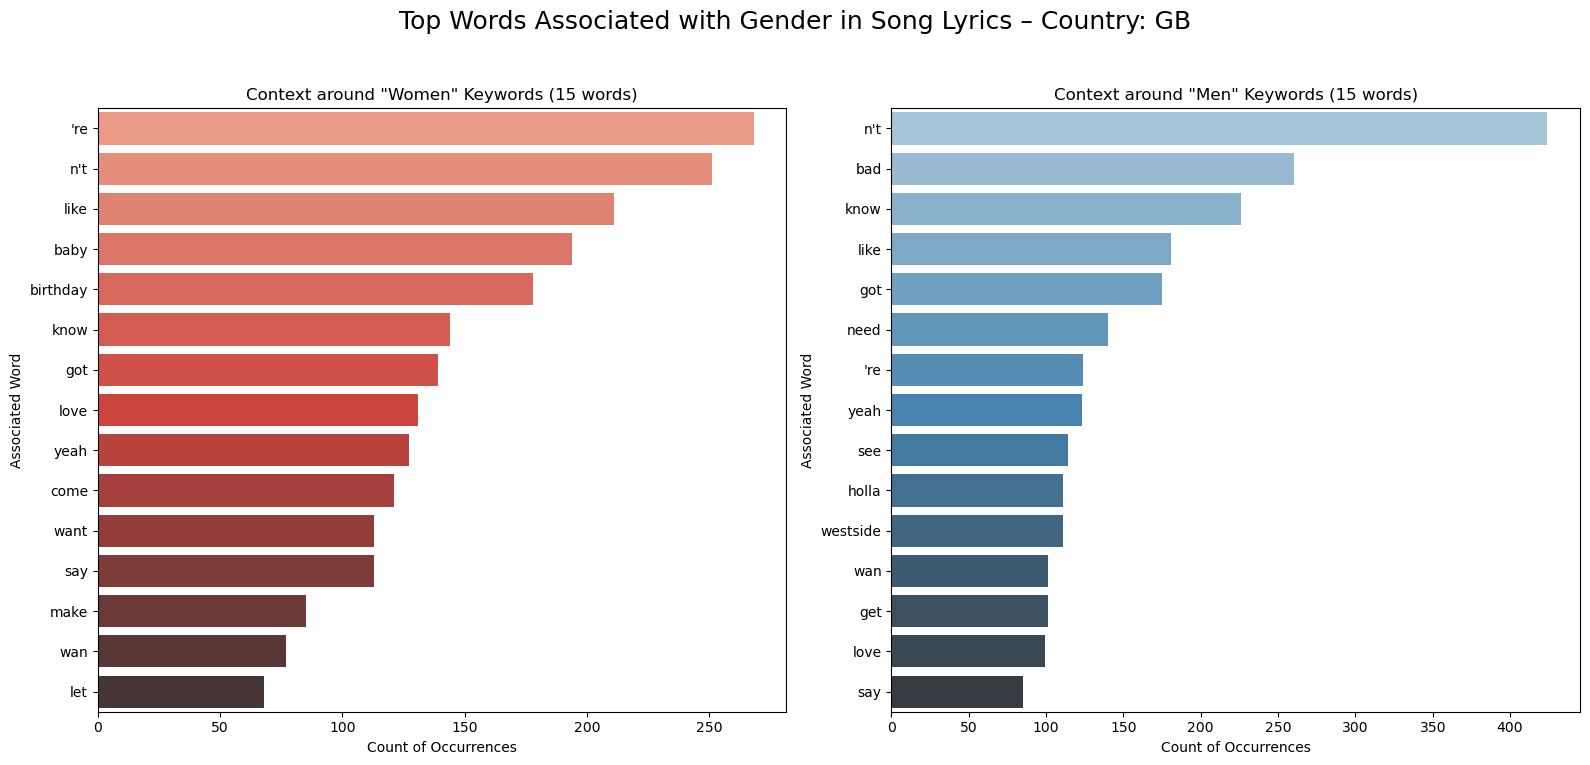

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/433366015.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


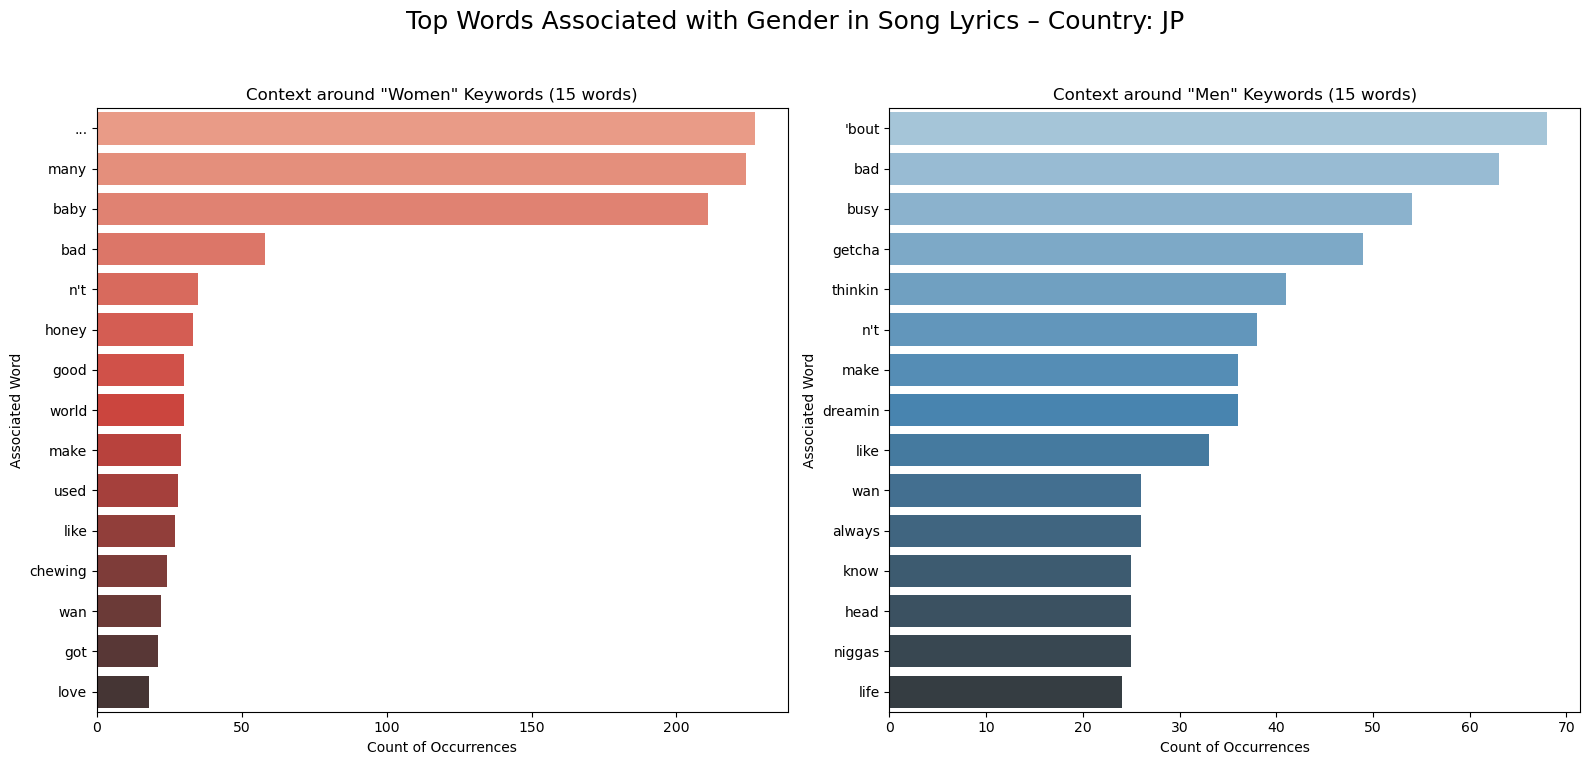

In [27]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

try:
    df = pd.read_csv("song_lyrics_with_ner.csv") 
    df['tokens_preprocessed'] = df['tokens'].apply(eval) 
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: Could not load the CSV file. Please ensure your preprocessed CSV exists.")
    print("Make sure you have run the initial data cleaning and preprocessing steps first.")
    exit()
except KeyError as e:
    print(f"Error: Required column not found: {e}.")
    print("Please ensure your loaded CSV contains 'tokens_preprocessed' and 'country' columns.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    exit()


df_filtered = df[
    (df['tokens_preprocessed'].apply(lambda x: len(x) > 0)) &
    df['country'].notna()
].copy() 

print(f"\nInitial songs for analysis after filtering: {len(df_filtered)}")
print(f"Unique raw country entries before expansion: {df_filtered['country'].nunique()} entries")
print(f"Example raw country entries: {df_filtered['country'].unique()[:5]}...")

if df_filtered.empty:
    print("No songs remaining after initial filtering. Please check your data and filter criteria.")
    exit()



def safe_list_eval_country(value):
    if pd.isna(value):
        return []
    if isinstance(value, list): 
        return value
    if isinstance(value, str):
        try: 
            evaluated = ast.literal_eval(value)
            if isinstance(evaluated, list):
                return [c.strip() for c in evaluated if c.strip()]
            return [value.strip()] 
        except (ValueError, SyntaxError):
            if ',' in value:
                return [c.strip() for c in value.split(',') if c.strip()]
            return [value.strip()] 
    return [str(value).strip()] 

df_filtered['country_list'] = df_filtered['country'].apply(safe_list_eval_country)

df_exploded = df_filtered.explode('country_list').copy()


df_exploded = df_exploded[df_exploded['country_list'].apply(lambda x: x is not None and x != '')].copy()


df_exploded.rename(columns={'country_list': 'associated_country'}, inplace=True)

print(f"\nSongs after expanding for all associated countries: {len(df_exploded)}")
print(f"Unique associated countries: {df_exploded['associated_country'].nunique()} countries")
print(f"Example associated countries: {df_exploded['associated_country'].unique()[:5]}...")



top_n_countries = 5 
if top_n_countries is not None:
    frequent_countries = df_exploded['associated_country'].value_counts().nlargest(top_n_countries).index.tolist()
    df_analysis = df_exploded[df_exploded['associated_country'].isin(frequent_countries)].copy()
    print(f"\nAnalyzing top {top_n_countries} most frequent associated countries: {frequent_countries}")
else:
    df_analysis = df_exploded.copy()
    print("\nAnalyzing all available associated countries.")

if df_analysis.empty:
    print("No songs remaining after filtering by associated countries. Please check your data.")
    exit()


print("\nDefining gender-related keywords and context window...")

# Keywords associated with 'women'
female_keywords = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'lady', 'ladies', 'female']
# Keywords associated with 'men'
male_keywords = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'guy', 'guys', 'male']


all_gender_keywords = set(female_keywords + male_keywords)


context_window_size = 5 

# --- Context Words per Country ---
print("\nAnalyzing context words per country...")


country_gender_context_top_words = {}

all_countries_to_analyze = sorted(df_analysis['associated_country'].unique())

for country in all_countries_to_analyze:
    print(f"Processing country: {country}...")
    country_subset_df = df_analysis[df_analysis['associated_country'] == country].copy()
    
    if country_subset_df.empty:
        country_gender_context_top_words[country] = {'female_context': [], 'male_context': []}
        continue 

    all_female_contexts_words_country = []
    all_male_contexts_words_country = []

    for index, row in country_subset_df.iterrows():
        tokens = row['tokens_preprocessed']
        
        for i, token in enumerate(tokens):
            if token in female_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]
                
                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                all_female_contexts_words_country.extend(context_words)
                
            elif token in male_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]

                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                all_male_contexts_words_country.extend(context_words)
    

    female_context_counts_country = Counter(all_female_contexts_words_country)
    male_context_counts_country = Counter(all_male_contexts_words_country)
    
    topn_words = 15 
    
    country_gender_context_top_words[country] = {
        'female_context': female_context_counts_country.most_common(topn_words),
        'male_context': male_context_counts_country.most_common(topn_words)
    }

# --- Display Results ---
print("\n--- Results: Top Words Associated with Gender Context by Country ---")
for country, data in country_gender_context_top_words.items():
    print(f"\nCountry: {country}")
    
    female_words = data['female_context']
    if female_words:
        print(f"  Words with 'Women' Context: {', '.join([f'{word} ({count})' for word, count in female_words])}")
    else:
        print(f"  Words with 'Women' Context: (Not enough data or keywords found)")
        
    male_words = data['male_context']
    if male_words:
        print(f"  Words with 'Men' Context: {', '.join([f'{word} ({count})' for word, count in male_words])}")
    else:
        print(f"  Words with 'Men' Context: (Not enough data or keywords found)")

# ---  Visualization for Selected Countries ---
print("\n--- Visualizing Context Words for Selected Countries ---")


countries_to_visualize = frequent_countries if 'frequent_countries' in locals() else all_countries_to_analyze 

for country in countries_to_visualize:
    if country in country_gender_context_top_words:
        female_data = country_gender_context_top_words[country]['female_context']
        male_data = country_gender_context_top_words[country]['male_context']

        has_female_data = bool(female_data)
        has_male_data = bool(male_data)

        if has_female_data or has_male_data:
            fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
            fig.suptitle(f'Top Words Associated with Gender in Song Lyrics – Country: {country}', fontsize=18)

            # Female Context Plot
            if has_female_data:
                df_female_context = pd.DataFrame(female_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
                axes[0].set_title(f'Context around "Women" Keywords ({len(female_data)} words)')
                axes[0].set_xlabel('Count of Occurrences')
                axes[0].set_ylabel('Associated Word')
            else:
                axes[0].text(0.5, 0.5, 'No data for "Women" context in this country',
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[0].transAxes, fontsize=12, color='gray')
                axes[0].set_title('Context around "Women" Keywords')
                axes[0].set_xticks([])
                axes[0].set_yticks([])
                axes[0].set_xlabel('')
                axes[0].set_ylabel('')

            # Male Context Plot
            if has_male_data:
                df_male_context = pd.DataFrame(male_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')
                axes[1].set_title(f'Context around "Men" Keywords ({len(male_data)} words)')
                axes[1].set_xlabel('Count of Occurrences')
                axes[1].set_ylabel('Associated Word')
            else:
                axes[1].text(0.5, 0.5, 'No data for "Men" context in this country',
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[1].transAxes, fontsize=12, color='gray')
                axes[1].set_title('Context around "Men" Keywords')
                axes[1].set_xticks([])
                axes[1].set_yticks([])
                axes[1].set_xlabel('')
                axes[1].set_ylabel('')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
        else:
            print(f"  Skipping visualization for Country: {country} (no gender-related context found).")
    else:
        print(f"  No data for country {country} to visualize.")

### Popularity Score

DataFrame loaded successfully.

Remaining songs for analysis after filtering: 6835
Artist Popularity score range: 1 - 100

Songs grouped into 3 popularity bins.
Popularity bin distribution:
popularity_bin
Popularity Bin 1    2317
Popularity Bin 2    2438
Popularity Bin 3    2080
Name: count, dtype: int64

Defining gender-related keywords and context window...

Analyzing context words per popularity bin...
Processing Popularity Bin: Popularity Bin 1...
Processing Popularity Bin: Popularity Bin 2...
Processing Popularity Bin: Popularity Bin 3...

--- Results: Top Words Associated with Gender Context by Popularity Bin ---

Popularity Bin: Popularity Bin 1
  Words with 'Women' Context: ... (260), n't (249), many (230), like (184), love (182), wan (111), flower (110), know (106), got (102), 're (90), pretty (89), want (86), come (76), let (69), baby (67)
  Words with 'Men' Context: n't (274), like (195), know (150), got (123), see (121), one (115), never (107), love (100), say (97), dem (97

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1743768389.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1743768389.py:181: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


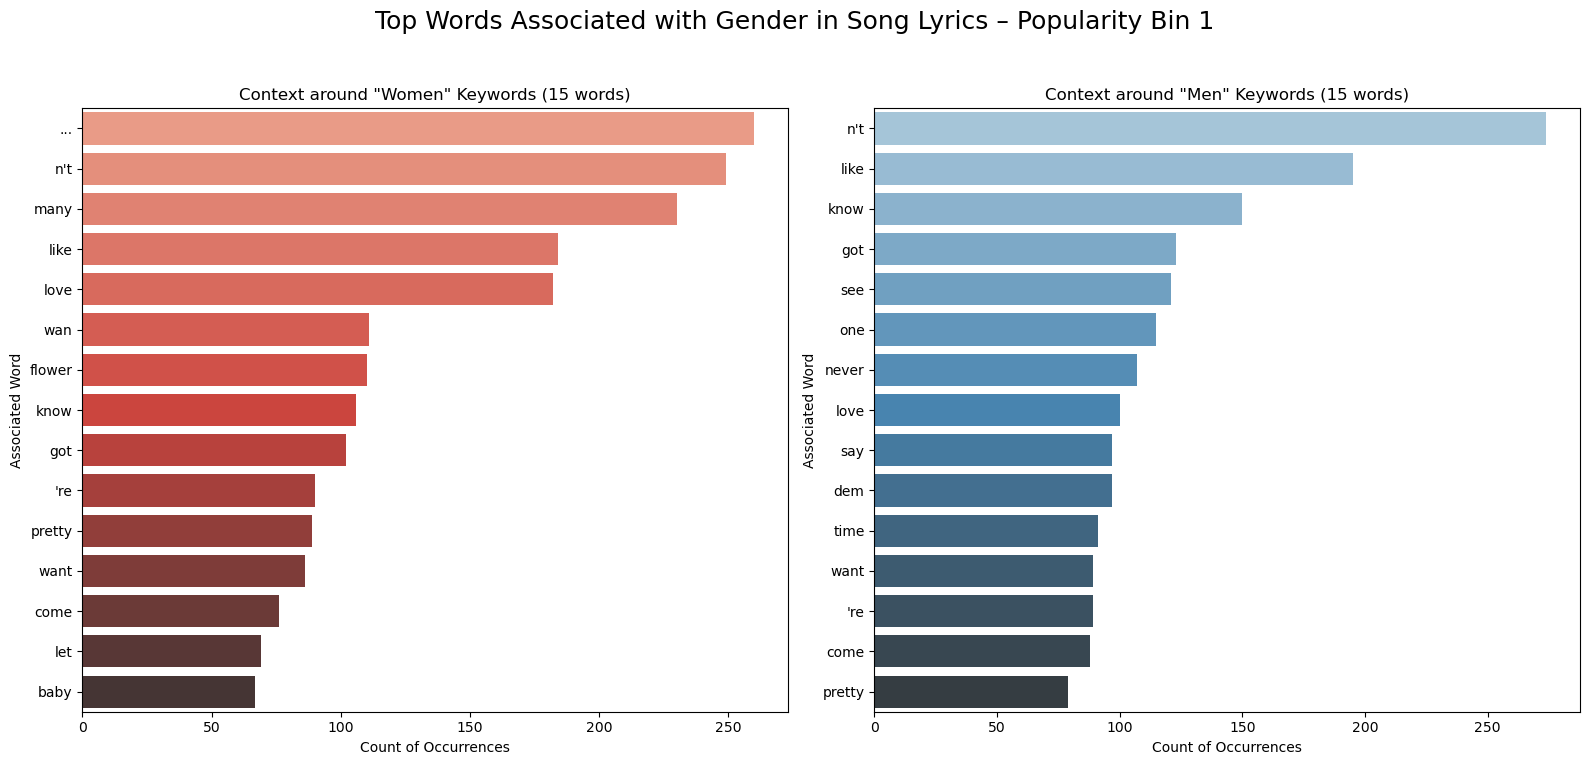

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1743768389.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1743768389.py:181: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


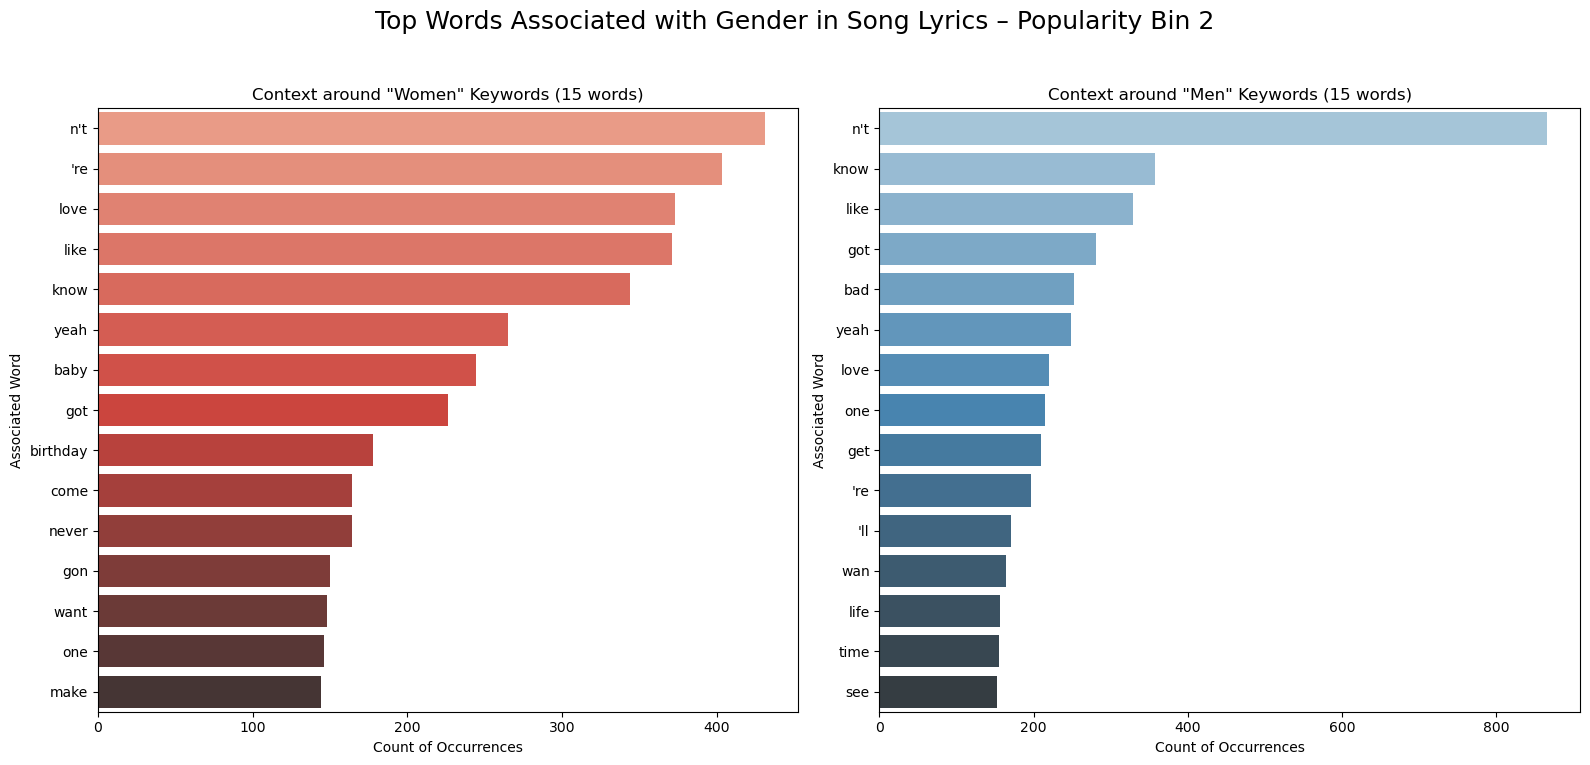

/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1743768389.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1743768389.py:181: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')


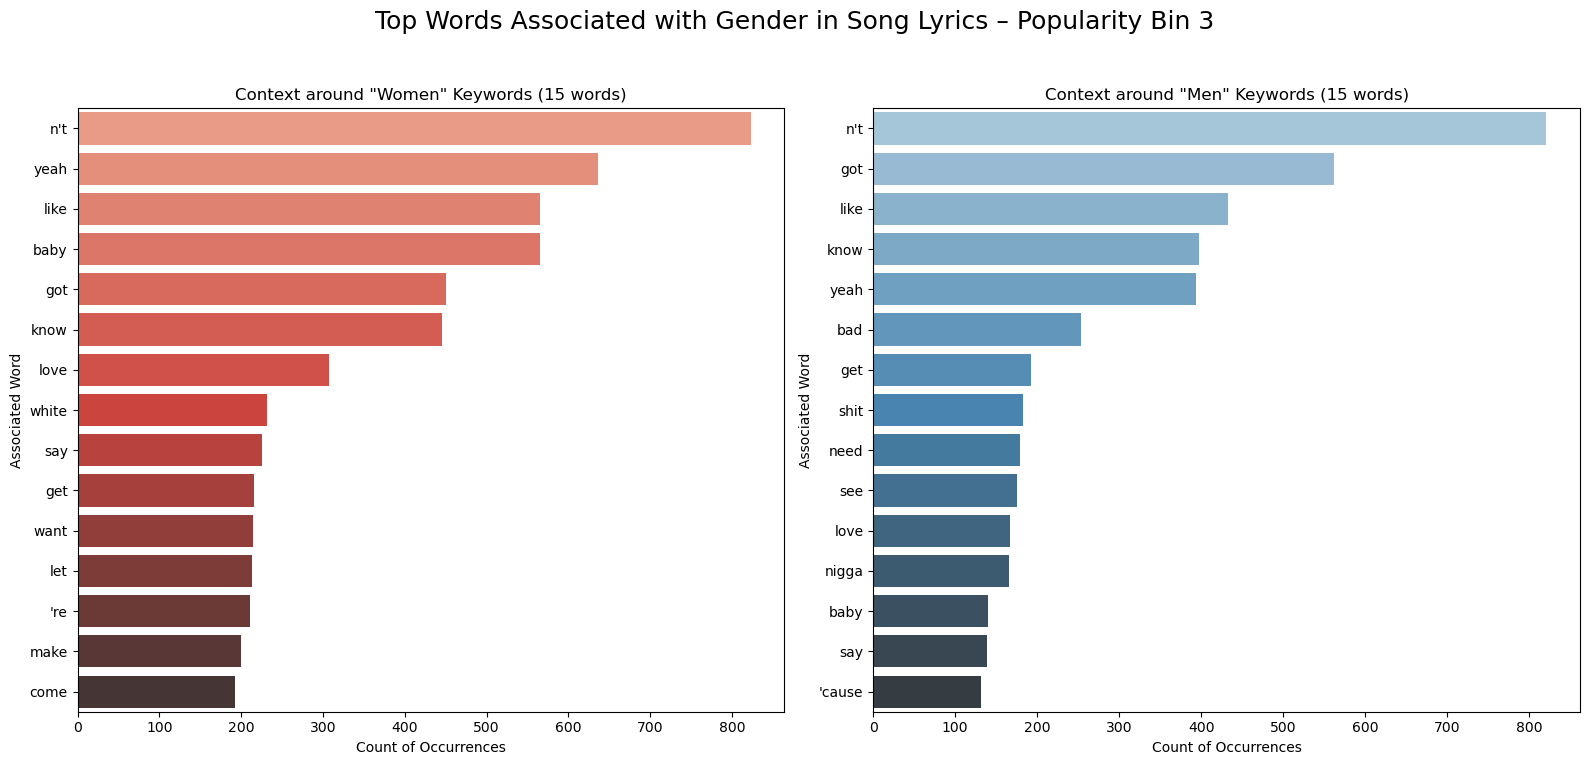

In [28]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import ast 


POPULARITY_COLUMN = 'artist_popularity' 

try:
    df = pd.read_csv("song_lyrics_with_ner.csv") 
    df['tokens_preprocessed'] = df['tokens'].apply(eval) 
    print("DataFrame loaded successfully.")
except FileNotFoundError:
    print("Error: Could not load the CSV file. Please ensure your preprocessed CSV exists.")
    print("Make sure you have run the initial data cleaning and preprocessing steps first.")
    exit()
except KeyError as e:
    print(f"Error: Required column not found: {e}.")
    print(f"Please ensure your loaded CSV contains 'tokens_preprocessed' and '{POPULARITY_COLUMN}' columns.")
    print(f"If you don't have a '{POPULARITY_COLUMN}' column, you need to add it to your DataFrame first.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    exit()


df_filtered = df[
    df[POPULARITY_COLUMN].notna() &
    (df['tokens_preprocessed'].apply(lambda x: len(x) > 0))
].copy() 


df_filtered[POPULARITY_COLUMN] = pd.to_numeric(df_filtered[POPULARITY_COLUMN], errors='coerce')
df_filtered.dropna(subset=[POPULARITY_COLUMN], inplace=True)

print(f"\nRemaining songs for analysis after filtering: {len(df_filtered)}")
print(f"Artist Popularity score range: {df_filtered[POPULARITY_COLUMN].min()} - {df_filtered[POPULARITY_COLUMN].max()}")

if df_filtered.empty:
    print("No songs remaining after filtering for popularity and tokens. Please check your data.")
    exit()

# --- 1. Bin Popularity Scores ---
# Divide the popularity scores into meaningful bins.

num_popularity_bins = 3 
df_filtered['popularity_bin'] = pd.qcut(df_filtered[POPULARITY_COLUMN], q=num_popularity_bins,
                                       labels=[f'Popularity Bin {i+1}' for i in range(num_popularity_bins)],
                                       duplicates='drop') 

df_filtered.dropna(subset=['popularity_bin'], inplace=True) 
print(f"\nSongs grouped into {num_popularity_bins} popularity bins.")
print(f"Popularity bin distribution:\n{df_filtered['popularity_bin'].value_counts().sort_index()}")

if df_filtered.empty:
    print("No songs remaining after popularity binning. Check your popularity data distribution.")
    exit()

# ---  Gender-Related Keywords and Context Window ---
print("\nDefining gender-related keywords and context window...")

# Keywords associated with 'women' 
female_keywords = ['woman', 'women', 'girl', 'girls', 'she', 'her', 'hers', 'lady', 'ladies', 'female']
# Keywords associated with 'men' 
male_keywords = ['man', 'men', 'boy', 'boys', 'he', 'him', 'his', 'guy', 'guys', 'male']


all_gender_keywords = set(female_keywords + male_keywords)


context_window_size = 5 

# --- Context Words per Popularity Bin ---
print("\nAnalyzing context words per popularity bin...")


popularity_bin_gender_context_top_words = {}

all_popularity_bins = sorted(df_filtered['popularity_bin'].unique())

for p_bin in all_popularity_bins:
    print(f"Processing Popularity Bin: {p_bin}...")
    bin_subset_df = df_filtered[df_filtered['popularity_bin'] == p_bin].copy()
    
    if bin_subset_df.empty:
        popularity_bin_gender_context_top_words[p_bin] = {'female_context': [], 'male_context': []}
        continue # Skip if no songs for this bin

    all_female_contexts_words_bin = []
    all_male_contexts_words_bin = []

    for index, row in bin_subset_df.iterrows():
        tokens = row['tokens_preprocessed']
        
        for i, token in enumerate(tokens):
            if token in female_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]
                
                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                all_female_contexts_words_bin.extend(context_words)
                
            elif token in male_keywords:
                start_index = max(0, i - context_window_size)
                context_before = tokens[start_index:i]
                
                end_index = min(len(tokens), i + context_window_size + 1)
                context_after = tokens[i+1:end_index]

                context_words = [w for w in (context_before + context_after) if w not in all_gender_keywords]
                all_male_contexts_words_bin.extend(context_words)
    
    # Count word frequencies for the current bin's contexts
    female_context_counts_bin = Counter(all_female_contexts_words_bin)
    male_context_counts_bin = Counter(all_male_contexts_words_bin)
    
    topn_words = 15 
    
    popularity_bin_gender_context_top_words[p_bin] = {
        'female_context': female_context_counts_bin.most_common(topn_words),
        'male_context': male_context_counts_bin.most_common(topn_words)
    }

# ---  Display Results ---
print("\n--- Results: Top Words Associated with Gender Context by Popularity Bin ---")
for p_bin, data in popularity_bin_gender_context_top_words.items():
    print(f"\nPopularity Bin: {p_bin}")
    
    female_words = data['female_context']
    if female_words:
        print(f"  Words with 'Women' Context: {', '.join([f'{word} ({count})' for word, count in female_words])}")
    else:
        print(f"  Words with 'Women' Context: (Not enough data or keywords found)")
        
    male_words = data['male_context']
    if male_words:
        print(f"  Words with 'Men' Context: {', '.join([f'{word} ({count})' for word, count in male_words])}")
    else:
        print(f"  Words with 'Men' Context: (Not enough data or keywords found)")

# ---  Visualization ---
print("\n--- Visualizing Context Words for Popularity Bins ---")

for p_bin in all_popularity_bins:
    if p_bin in popularity_bin_gender_context_top_words:
        female_data = popularity_bin_gender_context_top_words[p_bin]['female_context']
        male_data = popularity_bin_gender_context_top_words[p_bin]['male_context']

        has_female_data = bool(female_data)
        has_male_data = bool(male_data)

        if has_female_data or has_male_data:
            fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
            fig.suptitle(f'Top Words Associated with Gender in Song Lyrics – {p_bin}', fontsize=18)

            # Female Context Plot
            if has_female_data:
                df_female_context = pd.DataFrame(female_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_female_context, ax=axes[0], palette='Reds_d')
                axes[0].set_title(f'Context around "Women" Keywords ({len(female_data)} words)')
                axes[0].set_xlabel('Count of Occurrences')
                axes[0].set_ylabel('Associated Word')
            else:
                axes[0].text(0.5, 0.5, 'No data for "Women" context in this bin',
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[0].transAxes, fontsize=12, color='gray')
                axes[0].set_title('Context around "Women" Keywords')
                axes[0].set_xticks([])
                axes[0].set_yticks([])
                axes[0].set_xlabel('')
                axes[0].set_ylabel('')

            # Male Context Plot
            if has_male_data:
                df_male_context = pd.DataFrame(male_data, columns=['word', 'count'])
                sns.barplot(x='count', y='word', data=df_male_context, ax=axes[1], palette='Blues_d')
                axes[1].set_title(f'Context around "Men" Keywords ({len(male_data)} words)')
                axes[1].set_xlabel('Count of Occurrences')
                axes[1].set_ylabel('Associated Word')
            else:
                axes[1].text(0.5, 0.5, 'No data for "Men" context in this bin',
                             horizontalalignment='center', verticalalignment='center',
                             transform=axes[1].transAxes, fontsize=12, color='gray')
                axes[1].set_title('Context around "Men" Keywords')
                axes[1].set_xticks([])
                axes[1].set_yticks([])
                axes[1].set_xlabel('')
                axes[1].set_ylabel('')

            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
        else:
            print(f"  Skipping visualization for Popularity Bin: {p_bin} (no gender-related context found).")
    else:
        print(f"  No data for popularity bin {p_bin} to visualize.")


### Relationship Gender Artist

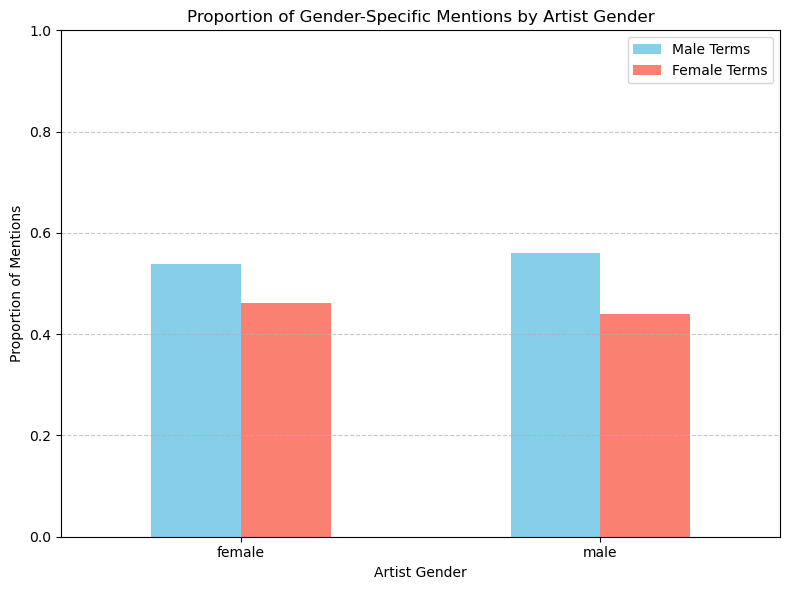

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("song_lyrics_with_ner.csv")
df['tokens_preprocessed'] = df['tokens'].apply(eval)


df_filtered = df[
    df['gender'].isin(['male', 'female']) &
    df['tokens_preprocessed'].apply(lambda x: len(x) > 0)
].copy()


masculine_terms = ['he', 'him', 'his', 'himself', 'man', 'men', 'boy', 'boys', 'guy', 'guys', 'father', 'dad', 'brother', 'king', 'prince']
feminine_terms = ['she', 'her', 'hers', 'herself', 'woman', 'women', 'girl', 'girls', 'lady', 'ladies', 'mother', 'mom', 'sister', 'queen', 'princess']
masculine_set = set(masculine_terms)
feminine_set = set(feminine_terms)


def count_gender_terms(tokens):
    male = sum(1 for token in tokens if token in masculine_set)
    female = sum(1 for token in tokens if token in feminine_set)
    return pd.Series([male, female])

df_filtered[['male_term_count', 'female_term_count']] = df_filtered['tokens_preprocessed'].apply(count_gender_terms)
df_filtered['total_mentions'] = df_filtered['male_term_count'] + df_filtered['female_term_count']


df_analysis = df_filtered[df_filtered['total_mentions'] > 0].copy()

# Proportionen 
summary = df_analysis.groupby('gender').agg(
    total_male=('male_term_count', 'sum'),
    total_female=('female_term_count', 'sum')
)
summary['male_ratio'] = summary['total_male'] / (summary['total_male'] + summary['total_female'])
summary['female_ratio'] = summary['total_female'] / (summary['total_male'] + summary['total_female'])

# Visualisierung
ratios = summary[['male_ratio', 'female_ratio']]
ratios.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Proportion of Gender-Specific Mentions by Artist Gender')
plt.xlabel('Artist Gender')
plt.ylabel('Proportion of Mentions')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(['Male Terms', 'Female Terms'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [39]:
import pandas as pd
from collections import Counter
import ast


df = pd.read_csv("song_lyrics_with_ner.csv")
df['tokens_preprocessed'] = df['tokens'].apply(ast.literal_eval)


df = df[
    df['gender'].isin(['male', 'female']) &
    df['tokens_preprocessed'].apply(lambda x: len(x) > 0)
].copy()


female_keywords = ['she', 'her', 'hers', 'herself', 'woman', 'women', 'girl', 'girls', 'lady', 'ladies', 'mother', 'mom', 'sister', 'queen', 'princess']
male_keywords = ['he', 'him', 'his', 'himself', 'man', 'men', 'boy', 'boys', 'guy', 'guys', 'father', 'dad', 'brother', 'king', 'prince']
all_gender_keywords = set(female_keywords + male_keywords)

context_window = 5
context_words_by_artist_gender = {
    'female_about_female': Counter(),
    'female_about_male': Counter(),
    'male_about_female': Counter(),
    'male_about_male': Counter(),
}


for _, row in df.iterrows():
    tokens = row['tokens_preprocessed']
    artist_gender = row['gender']

    for i, token in enumerate(tokens):
        if token in female_keywords:
            start = max(0, i - context_window)
            end = min(len(tokens), i + context_window + 1)
            context = tokens[start:i] + tokens[i+1:end]
            clean_context = [w for w in context if w not in all_gender_keywords]
            key = f"{artist_gender}_about_female"
            context_words_by_artist_gender[key].update(clean_context)

        elif token in male_keywords:
            start = max(0, i - context_window)
            end = min(len(tokens), i + context_window + 1)
            context = tokens[start:i] + tokens[i+1:end]
            clean_context = [w for w in context if w not in all_gender_keywords]
            key = f"{artist_gender}_about_male"
            context_words_by_artist_gender[key].update(clean_context)


topn = 15
for category, counter in context_words_by_artist_gender.items():
    print(f"\n--- Top {topn} words used by {category.replace('_', ' ')} ---")
    for word, count in counter.most_common(topn):
        print(f"{word} ({count})")



--- Top 15 words used by female about female ---
baby (278)
many (236)
n't (230)
... (225)
love (186)
like (166)
wan (146)
yeah (139)
know (126)
cry (121)
flower (107)
beat (88)
're (86)
make (84)
bad (80)

--- Top 15 words used by female about male ---
n't (316)
love (166)
like (165)
got (155)
know (149)
're (135)
yeah (114)
wan (94)
painter (92)
street (91)
one (88)
let (84)
baby (82)
gon (79)
dear (79)

--- Top 15 words used by male about female ---
n't (1368)
like (1064)
know (825)
love (810)
yeah (758)
got (737)
baby (688)
're (679)
come (471)
want (415)
say (397)
get (384)
let (376)
tell (371)
make (361)

--- Top 15 words used by male about male ---
n't (1881)
like (983)
got (892)
know (845)
yeah (624)
see (474)
bad (473)
get (453)
love (437)
one (433)
say (380)
shit (356)
never (339)
want (338)
come (324)


/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1966239133.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, ax=ax, palette="coolwarm")
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1966239133.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, ax=ax, palette="coolwarm")
/var/folders/84/xmc_00_n4bb2d4hdwtl1_h0m0000gn/T/ipykernel_75891/1966239133.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, ax=ax, palette="coolwarm")
/var/folders/84/xmc_00

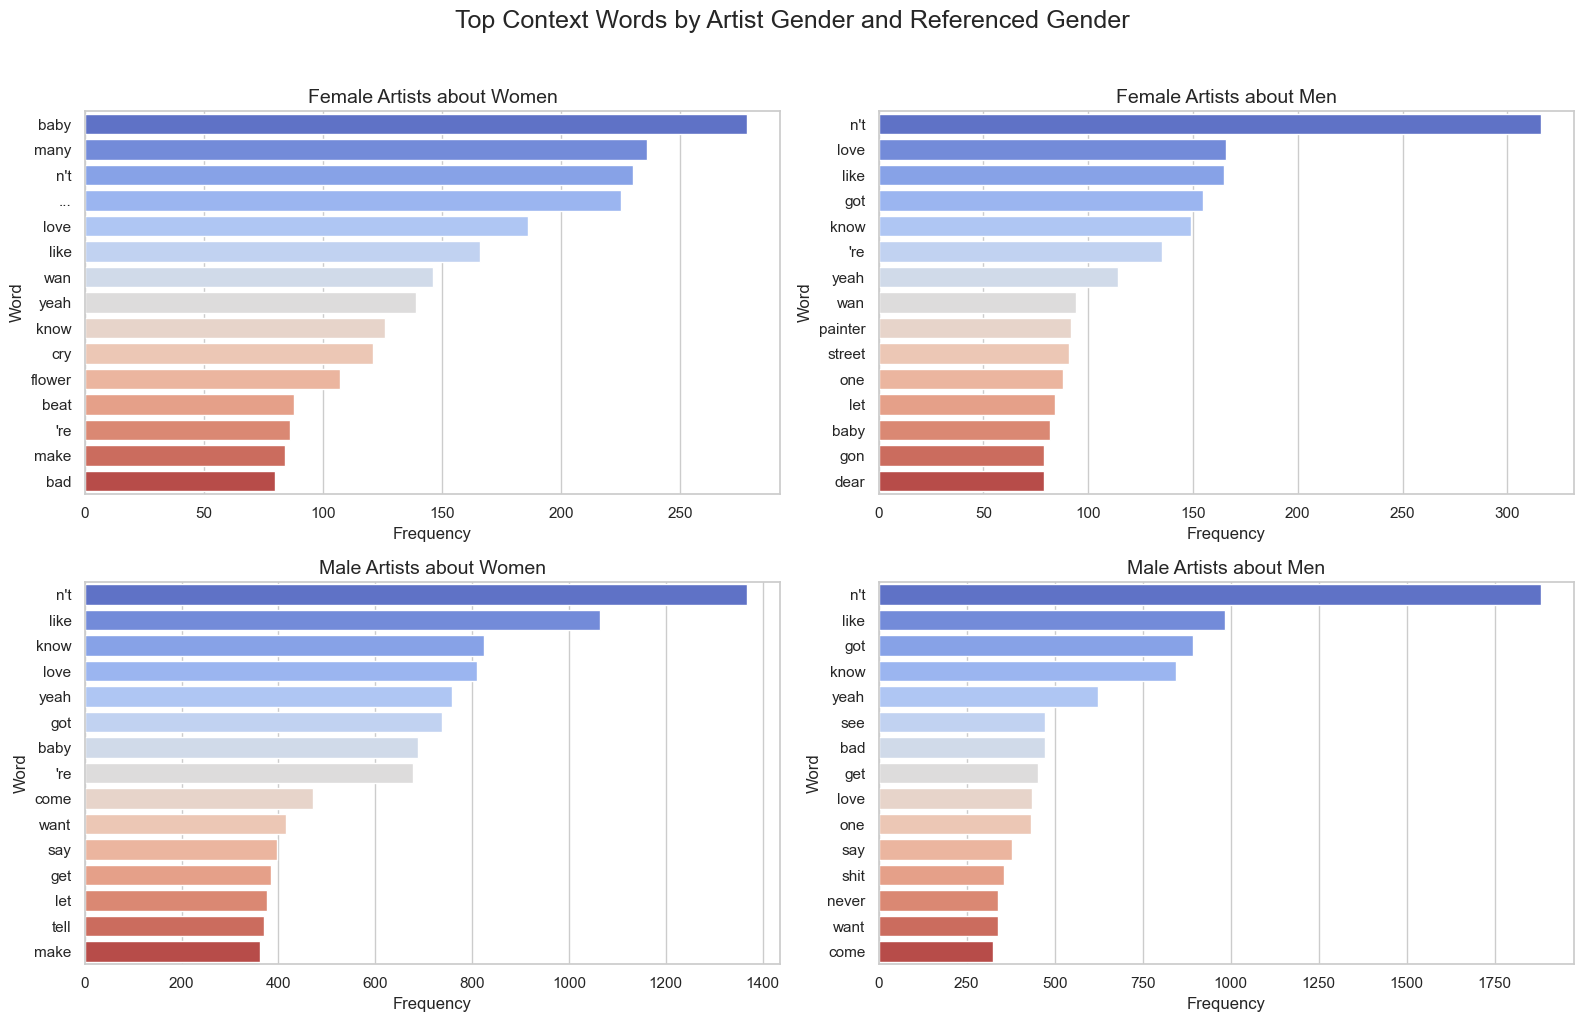

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stil
sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Top Context Words by Artist Gender and Referenced Gender', fontsize=18, y=1.02)

categories = ['female_about_female', 'female_about_male', 'male_about_female', 'male_about_male']
titles = [
    'Female Artists about Women',
    'Female Artists about Men',
    'Male Artists about Women',
    'Male Artists about Men'
]

for ax, category, title in zip(axes.flat, categories, titles):
    word_counts = context_words_by_artist_gender[category].most_common(topn)
    if word_counts:
        words, counts = zip(*word_counts)
        sns.barplot(x=counts, y=words, ax=ax, palette="coolwarm")
        ax.set_title(title, fontsize=14)
        ax.set_xlabel("Frequency")
        ax.set_ylabel("Word")
    else:
        ax.text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()
